In [104]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.float_format', lambda x: '%.6f' % x)

users = pd.read_csv("dados_para_correlacoes_juntos_por_temp.csv")
users.user_id.astype(int)
grouped = users.groupby('user_id')

exclude_column = 'temperamento'
agg_dict = {col: lambda series: series.iloc[0] for col in users.columns if col != exclude_column}
agg_dict.pop('user_id')
# print(agg_dict)
agg_dict['temperamento'] = lambda series: ','.join(series)

users_ = grouped.agg(agg_dict).reset_index()

def first_temp(ts):
    ts = ts.split(',')
    temp = ''
    for t in ts:
        temp += str(t[0])

    return temp

users_.temperamento = users_.temperamento.apply(first_temp)


users_
users_.to_csv('dados_para_correlacoes_juntos_.csv', index=False)

In [105]:
class Metrica(object):
    
    
    @staticmethod
    def uni(x, y, att):
        return abs(x[att] - y[att])
    
    @staticmethod
    def cuttoff(weight, c):
        return weight >= c

In [106]:
por_temp_str = "dados_para_correlacoes_juntos_por_temp.csv"
juntos_str = "dados_para_correlacoes_juntos_.csv"

# users = pd.read_csv(por_temp_str)
users = pd.read_csv(juntos_str)

In [107]:
users.head()

user_id  qtd_posts  media_likes  qtd_posts_positivos  qtd_posts_negativos  \
0        8          7   176.142857                    6                    0   
1       10          5     9.000000                    3                    0   
2       12          2    60.500000                    2                    0   
3       13          3   108.666667                    3                    0   
4       14         21    61.857143                   15                    0   

   qtd_posts_neutros  qtd_posts_possui_emoticon  seguidores  seguidos  \
0                  1                          7        1220      1108   
1                  2                          2          49        60   
2                  0                          1         161       279   
3                  0                          2         392       901   
4                  6                         12         529       599   

   proporcao_final_semana  proporcao_meio_semana  proporcao_manha  \
0                0.428600               0.571400         0.142900   
1                0.200000               0.800000         0.200000   
2                0.000000               1.000000         0.000000   
3                0.333300               0.666700         0.000000   
4                0.476200               0.523800         0.238100   

   proporcao_tarde  proporcao_noite  proporcao_madrugada temperamento  
0         0.428600         0.428600             0.000000           ad  
1         0.400000         0.200000             0.200000       acdhiw  
2         0.000000         1.000000             0.000000          cdi  
3         0.666700         0.333300             0.000000            d  
4         0.333300         0.381000             0.047600           cd

In [108]:
metrics = users.describe()
metrics

user_id   qtd_posts  media_likes  qtd_posts_positivos  \
count   91.000000   91.000000    91.000000            91.000000   
mean   480.021978   41.120879   113.527618            34.329670   
std    425.177949  191.570633   109.585469           165.948590   
min      8.000000    1.000000     0.000000             0.000000   
25%    145.000000    5.000000    44.000000             3.000000   
50%    242.000000   13.000000    75.741935            10.000000   
75%   1013.500000   26.500000   132.013955            23.000000   
max   1040.000000 1834.000000   555.214286          1587.000000   

       qtd_posts_negativos  qtd_posts_neutros  qtd_posts_possui_emoticon  \
count            91.000000          91.000000                  91.000000   
mean              0.142857           6.648352                  19.516484   
std               0.410188          26.091452                  59.396476   
min               0.000000           0.000000                   0.000000   
25%               0.000000           1.000000                   1.500000   
50%               0.000000           2.000000                   7.000000   
75%               0.000000           6.000000                  17.000000   
max               2.000000         247.000000                 549.000000   

        seguidores    seguidos  proporcao_final_semana  proporcao_meio_semana  \
count    91.000000   91.000000               91.000000              91.000000   
mean   1666.065934 1024.000000                0.347548               0.652452   
std    6281.498788 1162.928994                0.196674               0.196674   
min      49.000000   60.000000                0.000000               0.000000   
25%     388.500000  425.000000                0.250000               0.540100   
50%     824.000000  702.000000                0.333300               0.666700   
75%    1172.500000 1166.500000                0.459900               0.750000   
max   60102.000000 7433.000000                1.000000               1.000000   

       proporcao_manha  proporcao_tarde  proporcao_noite  proporcao_madrugada  
count        91.000000        91.000000        91.000000            91.000000  
mean          0.151197         0.267155         0.457099             0.124547  
std           0.167690         0.226924         0.256550             0.171590  
min           0.000000         0.000000         0.000000             0.000000  
25%           0.000000         0.110350         0.285700             0.000000  
50%           0.125000         0.257400         0.409100             0.045500  
75%           0.250000         0.333300         0.634550             0.200000  
max           1.000000         1.000000         1.000000             0.750000

In [109]:
users.shape

(91, 16)

In [110]:
users['temperamento'].value_counts()

temperamento
d         44
acdhiw    27
cd         6
i          4
cdi        3
di         3
ad         1
hi         1
dh         1
c          1
Name: count, dtype: int64

In [111]:
# metrics=['count', 'mean', 'std']
def metrics_stratified_filtered(users, metrics=None):
    if metrics is None:
        return users.groupby('temperamento').describe()
    else:
        return users.groupby('temperamento').describe().loc[:, (slice(None), metrics)]

In [112]:
ms = metrics_stratified_filtered(users)
ms

user_id                                                 \
                 count        mean        std         min         25%   
temperamento                                                            
acdhiw       27.000000  499.370370 409.111152   10.000000  204.500000   
ad            1.000000    8.000000        NaN    8.000000    8.000000   
c             1.000000 1024.000000        NaN 1024.000000 1024.000000   
cd            6.000000  157.166667 111.129504   14.000000   62.500000   
cdi           3.000000  417.666667 519.355691   12.000000  125.000000   
d            44.000000  518.204545 447.715731   13.000000  122.750000   
dh            1.000000 1020.000000        NaN 1020.000000 1020.000000   
di            3.000000  172.000000 132.661223   19.000000  130.500000   
hi            1.000000  202.000000        NaN  202.000000  202.000000   
i             4.000000  608.000000 487.646046  115.000000  226.000000   

                                                 qtd_posts            ...  \
                     50%         75%         max     count      mean  ...   
temperamento                                                          ...   
acdhiw        262.000000 1003.500000 1036.000000 27.000000 23.629630  ...   
ad              8.000000    8.000000    8.000000  1.000000  7.000000  ...   
c            1024.000000 1024.000000 1024.000000  1.000000 22.000000  ...   
cd            193.000000  243.250000  264.000000  6.000000 30.833333  ...   
cdi           238.000000  620.500000 1003.000000  3.000000 11.333333  ...   
d             230.500000 1016.500000 1040.000000 44.000000 63.590909  ...   
dh           1020.000000 1020.000000 1020.000000  1.000000  1.000000  ...   
di            242.000000  248.500000  255.000000  3.000000 11.000000  ...   
hi            202.000000  202.000000  202.000000  1.000000  1.000000  ...   
i             640.000000 1022.000000 1037.000000  4.000000  5.750000  ...   

             proporcao_noite          proporcao_madrugada                    \
                         75%      max               count     mean      std   
temperamento                                                                  
acdhiw              0.619050 1.000000           27.000000 0.153178 0.189822   
ad                  0.428600 0.428600            1.000000 0.000000      NaN   
c                   0.409100 0.409100            1.000000 0.136400      NaN   
cd                  0.414225 0.625000            6.000000 0.087233 0.129327   
cdi                 0.673900 1.000000            3.000000 0.199700 0.308985   
d                   0.666700 1.000000           44.000000 0.107327 0.147847   
dh                  0.000000 0.000000            1.000000 0.000000      NaN   
di                  0.675000 1.000000            3.000000 0.072233 0.085545   
hi                  0.000000 0.000000            1.000000 0.000000      NaN   
i                   0.500000 0.500000            4.000000 0.250000 0.319154   

                                                           
                  min      25%      50%      75%      max  
temperamento                                               
acdhiw       0.000000 0.000000 0.095200 0.218250 0.750000  
ad           0.000000 0.000000 0.000000 0.000000 0.000000  
c            0.136400 0.136400 0.136400 0.136400 0.136400  
cd           0.000000 0.004375 0.032550 0.105650 0.333300  
cdi          0.000000 0.021750 0.043500 0.299550 0.555600  
d            0.000000 0.000000 0.021900 0.179400 0.523800  
dh           0.000000 0.000000 0.000000 0.000000 0.000000  
di           0.000000 0.025000 0.050000 0.108350 0.166700  
hi           0.000000 0.000000 0.000000 0.000000 0.000000  
i            0.000000 0.000000 0.166650 0.416650 0.666700  

[10 rows x 120 columns]

In [113]:
msf = metrics_stratified_filtered(users, metrics=['count', 'mean', 'std'])
msf

user_id                        qtd_posts                       \
                 count        mean        std     count      mean        std   
temperamento                                                                   
acdhiw       27.000000  499.370370 409.111152 27.000000 23.629630  26.459182   
ad            1.000000    8.000000        NaN  1.000000  7.000000        NaN   
c             1.000000 1024.000000        NaN  1.000000 22.000000        NaN   
cd            6.000000  157.166667 111.129504  6.000000 30.833333  33.736726   
cdi           3.000000  417.666667 519.355691  3.000000 11.333333  10.692677   
d            44.000000  518.204545 447.715731 44.000000 63.590909 274.172100   
dh            1.000000 1020.000000        NaN  1.000000  1.000000        NaN   
di            3.000000  172.000000 132.661223  3.000000 11.000000   9.539392   
hi            1.000000  202.000000        NaN  1.000000  1.000000        NaN   
i             4.000000  608.000000 487.646046  4.000000  5.750000   4.500000   

             media_likes                       qtd_posts_positivos  ...  \
                   count       mean        std               count  ...   
temperamento                                                        ...   
acdhiw         27.000000 117.806560 129.399676           27.000000  ...   
ad              1.000000 176.142857        NaN            1.000000  ...   
c               1.000000 245.363636        NaN            1.000000  ...   
cd              6.000000 113.506791  57.489719            6.000000  ...   
cdi             3.000000  85.889694  69.383049            3.000000  ...   
d              44.000000 110.736057 105.090938           44.000000  ...   
dh              1.000000  38.000000        NaN            1.000000  ...   
di              3.000000 162.794444 203.837276            3.000000  ...   
hi              1.000000  31.000000        NaN            1.000000  ...   
i               4.000000  90.062500  70.422251            4.000000  ...   

             proporcao_manha proporcao_tarde                    \
                         std           count     mean      std   
temperamento                                                     
acdhiw              0.148905       27.000000 0.227656 0.209923   
ad                       NaN        1.000000 0.428600      NaN   
c                        NaN        1.000000 0.409100      NaN   
cd                  0.150927        6.000000 0.272633 0.102381   
cdi                 0.125516        3.000000 0.204500 0.196250   
d                   0.187820       44.000000 0.256305 0.209538   
dh                       NaN        1.000000 1.000000      NaN   
di                  0.132288        3.000000 0.266667 0.275379   
hi                       NaN        1.000000 1.000000      NaN   
i                   0.159560        4.000000 0.250000 0.215157   

             proporcao_noite                   proporcao_madrugada           \
                       count     mean      std               count     mean   
temperamento                                                                  
acdhiw             27.000000 0.473863 0.252037           27.000000 0.153178   
ad                  1.000000 0.428600      NaN            1.000000 0.000000   
c                   1.000000 0.409100      NaN            1.000000 0.136400   
cd                  6.000000 0.365750 0.156320            6.000000 0.087233   
cdi                 3.000000 0.523333 0.417555            3.000000 0.199700   
d                  44.000000 0.477641 0.258163           44.000000 0.107327   
dh                  1.000000 0.000000      NaN            1.000000 0.000000   
di                  3.000000 0.561100 0.380190            3.000000 0.072233   
hi                  1.000000 0.000000      NaN            1.000000 0.000000   
i                   4.000000 0.375000 0.159560            4.000000 0.250000   

                       
                  std  
temperamento           
acdhiw       0.189822  
ad             

In [114]:
import numpy as np
from scipy.stats import f

def calculate_if_var_significant(metric, temp1, temp2, msf=None, alpha=0.05, filter_for_significant=False, print_res=True):   
    # Sample data (standard deviations and sample sizes)
    s1 = msf[metric].at[temp1, 'std']  # Standard deviation of sample 1
    s2 = msf[metric].at[temp2, 'std']  # Standard deviation of sample 2
    n1 = msf[metric].at[temp1, 'count']  # Sample size of sample 1
    n2 = msf[metric].at[temp1, 'count']  # Sample size of sample 2
    
    # Variance calculation
    var1 = s1 ** 2
    var2 = s2 ** 2
    
    # F-statistic calculation

    F = var1 / var2
    
    # Degrees of freedom
    df1 = n1 - 1
    df2 = n2 - 1
    
    # P-value calculation
    p_value = 2 * min(f.cdf(F, df1, df2), 1 - f.cdf(F, df1, df2))
    
    # Interpret the result
    if p_value < alpha:
        if print_res:
            print(f'F-statistic: {F}')
            print(f'P-value: {p_value}')
            print(f"Reject the null hypothesis: The variances for '{metric}' found for '{temp1}' and '{temp2}' are significantly different.")
        return (metric, temp1, temp2, p_value, alpha)
    elif not filter_for_significant:
        if print_res:
            print(f'F-statistic: {F}')
            print(f'P-value: {p_value}')
            print(f"Fail to reject the null hypothesis: The variances for '{metric}' found for '{temp1}' and '{temp2}' are NOT significantly different.")
        return (metric, temp1, temp2, p_value, alpha)


In [115]:
import itertools as it

def calc_all_var_significants(users, **kwargs):
    metrics = list(filter(lambda e: e not in ['user_id', 'temperamento'], users.columns))
    temps = list(filter(lambda x: x[0]<x[1], it.combinations(users['temperamento'].unique(), 2)))
    msf = metrics_stratified_filtered(users)
    alpha = kwargs['alpha']
    
    rs = []
    
    for metric in metrics:
        for temp1, temp2 in temps:
            # print(temp1, temp2)
            try:
                r = calculate_if_var_significant(metric, temp1, temp2, msf, alpha, filter_for_significant=True, print_res=False)
            except:
                r = None
            # print(r)
            if r is not None:
                (metric, temp1, temp2, p_value, alpha) = r
                rs.append((metric, temp1, temp2, p_value))

    return rs

In [116]:
all_sign_vars = pd.DataFrame(calc_all_var_significants(users, alpha=0.05), columns=['metric', 'temp1', 'temp2', 'p_value'])
all_sign_vars

C:\Users\ph_ma\AppData\Local\Temp\ipykernel_11856\2965982996.py:17: RuntimeWarning: divide by zero encountered in scalar divide
  F = var1 / var2


metric   temp1 temp2  p_value
0                   qtd_posts  acdhiw   cdi 0.000016
1                   qtd_posts  acdhiw     d 0.000000
2                   qtd_posts  acdhiw    di 0.000002
3                   qtd_posts  acdhiw     i 0.000000
4                   qtd_posts     cdi     d 0.003037
5                   qtd_posts       d    di 0.000000
6                   qtd_posts       d     i 0.000000
7                   qtd_posts      cd    di 0.014937
8                   qtd_posts      cd     i 0.000431
9                 media_likes  acdhiw   cdi 0.002253
10                media_likes  acdhiw    cd 0.000095
11                media_likes  acdhiw    di 0.023975
12                media_likes  acdhiw     i 0.002828
13                media_likes       d    di 0.000030
14                media_likes       d     i 0.009984
15                media_likes      cd    di 0.014767
16        qtd_posts_positivos  acdhiw   cdi 0.000001
17        qtd_posts_positivos  acdhiw     d 0.000000
18        qtd_posts_positivos  acdhiw    di 0.000001
19        qtd_posts_positivos  acdhiw     i 0.000000
20        qtd_posts_positivos     cdi     d 0.002374
21        qtd_posts_positivos       d    di 0.000000
22        qtd_posts_positivos       d     i 0.000000
23        qtd_posts_positivos      cd    di 0.007920
24        qtd_posts_positivos      cd     i 0.000455
25        qtd_posts_negativos  acdhiw   cdi 0.020511
26        qtd_posts_negativos  acdhiw    di 0.020511
27        qtd_posts_negativos  acdhiw     i 0.000000
28        qtd_posts_negativos     cdi     i 0.000000
29        qtd_posts_negativos       d     i 0.000000
30        qtd_posts_negativos      cd     i 0.000000
31        qtd_posts_negativos      di     i 0.000000
32          qtd_posts_neutros  acdhiw   cdi 0.000799
33          qtd_posts_neutros  acdhiw     d 0.000000
34          qtd_posts_neutros  acdhiw    cd 0.044150
35          qtd_posts_neutros  acdhiw    di 0.022762
36          qtd_posts_neutros  acdhiw     i 0.000050
37          qtd_posts_neutros     cdi     d 0.005734
38          qtd_posts_neutros       d    di 0.000000
39          qtd_posts_neutros       d     i 0.000000
40  qtd_posts_possui_emoticon  acdhiw   cdi 0.000280
41  qtd_posts_possui_emoticon  acdhiw     d 0.000000
42  qtd_posts_possui_emoticon  acdhiw    cd 0.003068
43  qtd_posts_possui_emoticon  acdhiw    di 0.000001
44  qtd_posts_possui_emoticon  acdhiw     i 0.000000
45  qtd_posts_possui_emoticon     cdi     d 0.023093
46  qtd_posts_possui_emoticon       d    di 0.000000
47  qtd_posts_possui_emoticon       d     i 0.000000
48  qtd_posts_possui_emoticon      cd    di 0.002312
49  qtd_posts_possui_emoticon      cd     i 0.000583
50                 seguidores  acdhiw   cdi 0.000045
51                 seguidores  acdhiw     d 0.000000
52                 seguidores  acdhiw    cd 0.049386
53                 seguidores  acdhiw    di 0.005476
54                 seguidores  acdhiw     i 0.000330
55                 seguidores     cdi     d 0.003090
56                 seguidores       d    di 0.000000
57                 seguidores       d     i 0.000000
58                 seguidores      cd     i 0.026295
59                   seguidos  acdhiw   cdi 0.000000
60                   seguidos  acdhiw     d 0.000185
61                   seguidos  acdhiw    di 0.000000
62                   seguidos  acdhiw     i 0.001097
63                   seguidos     cdi     d 0.046607
64                   seguidos       d    di 0.000000
65                   seguidos       d     i 0.000000
66                   seguidos      cd    di 0.005753
67     proporcao_final_semana  acdhiw   cdi 0.000008
68     proporcao_final_semana  acdhiw    di 0.000580
69     proporcao_final_semana  acdhiw     i 0.002329
70     proporcao_final_semana       d    di 0.010913
71     proporcao_final_semana       d     i 0.000000
72      proporcao_meio_semana  acdhiw   cdi 0.000008
73      proporcao_meio_semana  acdhiw    di 0.000580
74      proporcao_meio_semana  acdhiw     i 0.00

In [117]:
all_sign_vars.sort_values(by='p_value', ascending=False)

metric   temp1 temp2  p_value
52                 seguidores  acdhiw    cd 0.049386
79            proporcao_tarde      cd    di 0.048746
63                   seguidos     cdi     d 0.046607
34          qtd_posts_neutros  acdhiw    cd 0.044150
82            proporcao_noite  acdhiw    di 0.040537
58                 seguidores      cd     i 0.026295
11                media_likes  acdhiw    di 0.023975
77            proporcao_manha       d    di 0.023670
83            proporcao_noite  acdhiw     i 0.023165
45  qtd_posts_possui_emoticon     cdi     d 0.023093
35          qtd_posts_neutros  acdhiw    di 0.022762
25        qtd_posts_negativos  acdhiw   cdi 0.020511
26        qtd_posts_negativos  acdhiw    di 0.020511
81            proporcao_noite  acdhiw    cd 0.017831
86        proporcao_madrugada  acdhiw   cdi 0.015747
7                   qtd_posts      cd    di 0.014937
15                media_likes      cd    di 0.014767
84            proporcao_noite       d    di 0.012659
80            proporcao_noite  acdhiw   cdi 0.012461
75      proporcao_meio_semana       d    di 0.010913
70     proporcao_final_semana       d    di 0.010913
88        proporcao_madrugada  acdhiw     i 0.010203
14                media_likes       d     i 0.009984
23        qtd_posts_positivos      cd    di 0.007920
66                   seguidos      cd    di 0.005753
37          qtd_posts_neutros     cdi     d 0.005734
53                 seguidores  acdhiw    di 0.005476
55                 seguidores     cdi     d 0.003090
42  qtd_posts_possui_emoticon  acdhiw    cd 0.003068
4                   qtd_posts     cdi     d 0.003037
12                media_likes  acdhiw     i 0.002828
20        qtd_posts_positivos     cdi     d 0.002374
74      proporcao_meio_semana  acdhiw     i 0.002329
69     proporcao_final_semana  acdhiw     i 0.002329
48  qtd_posts_possui_emoticon      cd    di 0.002312
9                 media_likes  acdhiw   cdi 0.002253
85            proporcao_noite       d     i 0.002072
62                   seguidos  acdhiw     i 0.001097
32          qtd_posts_neutros  acdhiw   cdi 0.000799
49  qtd_posts_possui_emoticon      cd     i 0.000583
68     proporcao_final_semana  acdhiw    di 0.000580
73      proporcao_meio_semana  acdhiw    di 0.000580
89        proporcao_madrugada       d    di 0.000494
78            proporcao_tarde  acdhiw    cd 0.000487
24        qtd_posts_positivos      cd     i 0.000455
8                   qtd_posts      cd     i 0.000431
54                 seguidores  acdhiw     i 0.000330
40  qtd_posts_possui_emoticon  acdhiw   cdi 0.000280
60                   seguidos  acdhiw     d 0.000185
87        proporcao_madrugada  acdhiw    di 0.000123
10                media_likes  acdhiw    cd 0.000095
36          qtd_posts_neutros  acdhiw     i 0.000050
50                 seguidores  acdhiw   cdi 0.000045
13                media_likes       d    di 0.000030
0                   qtd_posts  acdhiw   cdi 0.000016
67     proporcao_final_semana  acdhiw   cdi 0.000008
72      proporcao_meio_semana  acdhiw   cdi 0.000008
2                   qtd_posts  acdhiw    di 0.000002
90        proporcao_madrugada       d     i 0.000002
16        qtd_posts_positivos  acdhiw   cdi 0.000001
18        qtd_posts_positivos  acdhiw    di 0.000001
43  qtd_posts_possui_emoticon  acdhiw    di 0.000001
59                   seguidos  acdhiw   cdi 0.000000
76      proporcao_meio_semana       d     i 0.000000
71     proporcao_final_semana       d     i 0.000000
44  qtd_posts_possui_emoticon  acdhiw     i 0.000000
61                   seguidos  acdhiw    di 0.000000
41  qtd_posts_possui_emoticon  acdhiw     d 0.000000
19        qtd_posts_positivos  acdhiw     i 0.000000
3                   qtd_posts  acdhiw     i 0.000000
39          qtd_posts_neutros       d     i 0.000000
38          qtd_posts_neutros       d    di 0.000000
65                   seguidos       d     i 0.000000
64                   seguidos       d    di 0.000000
56                 seguidores       d    di 0.00

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def draw_distributions(temp1, temp2, metric=None, msf=None, size=10000, color1='blue', color2='orange'):

    # Define mean and standard deviation for the distributions
    mean1, std1 = msf[metric].at[temp1, 'mean'], msf[metric].at[temp1, 'std']  # Distribution 1
    mean2, std2 = msf[metric].at[temp2, 'mean'], msf[metric].at[temp2, 'std']  # Distribution 2
    
    # Generate data for the distributions
    data1 = np.random.normal(loc=mean1, scale=std1, size=size)
    data2 = np.random.normal(loc=mean2, scale=std2, size=size)
    
    # Create a Seaborn plot
    sns.histplot(data=data1, kde=True, color=color1, label=temp1, fill=False, element="step")
    sns.histplot(data=data2, kde=True, color=color2, label=temp2, fill=False, element="step")
    
    # Add labels and title
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title(f"Two Normal Distributions For '{metric}'")

    # Add a legend
    plt.legend()
    
    # Show the plot
    plt.show()

C:\Users\ph_ma\AppData\Local\Temp\ipykernel_11856\2965982996.py:17: RuntimeWarning: divide by zero encountered in scalar divide
  F = var1 / var2


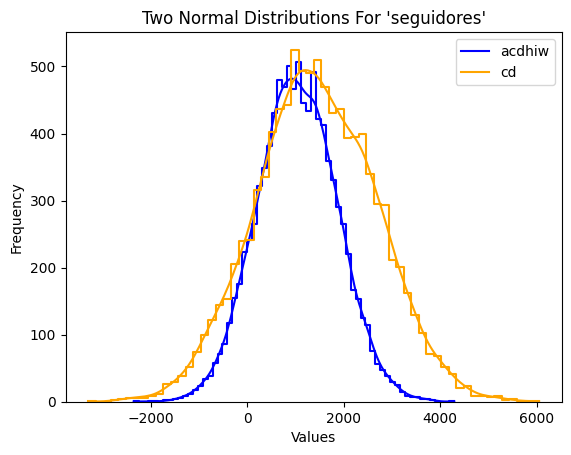

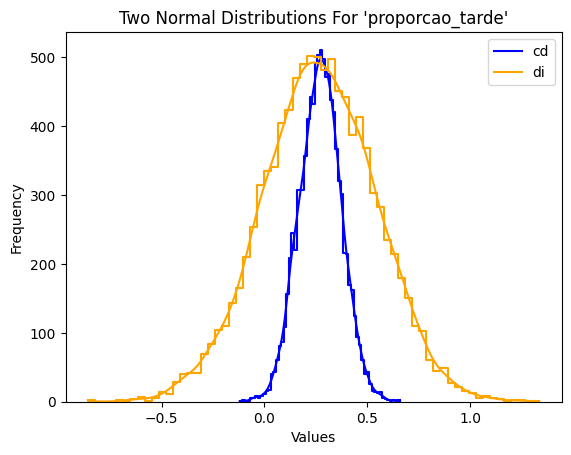

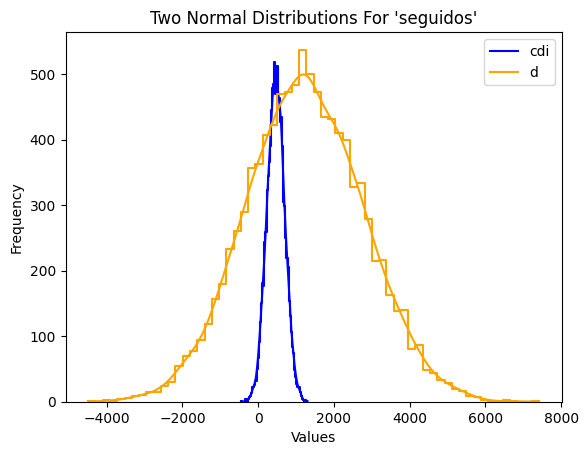

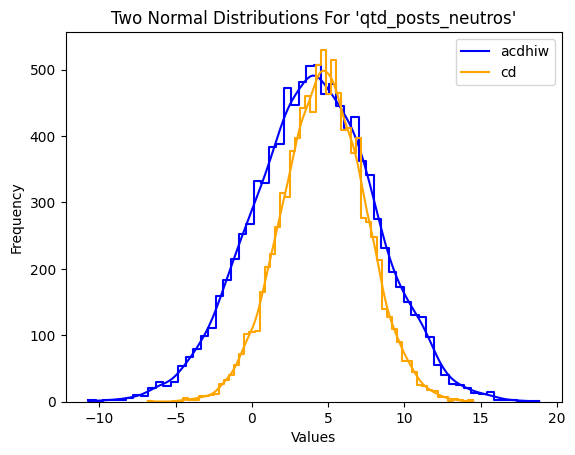

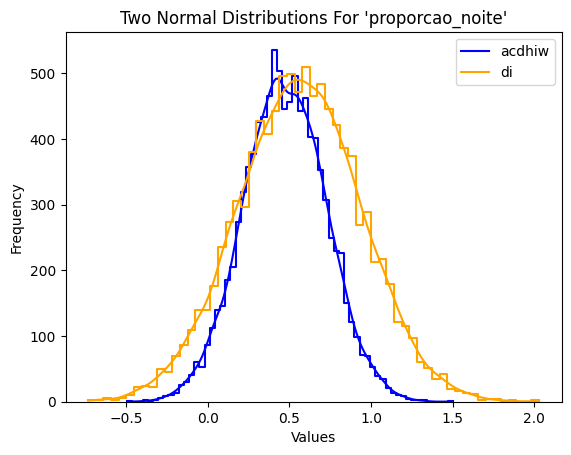

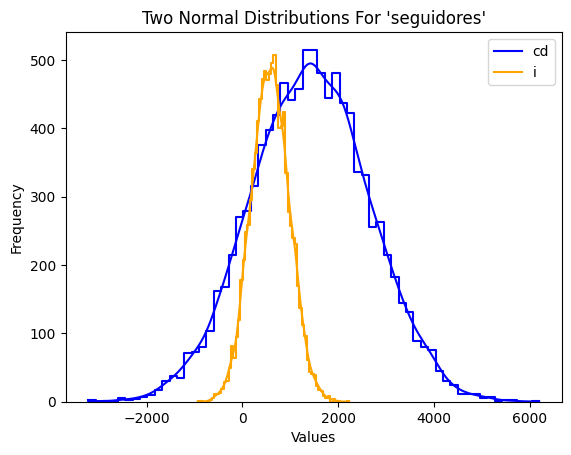

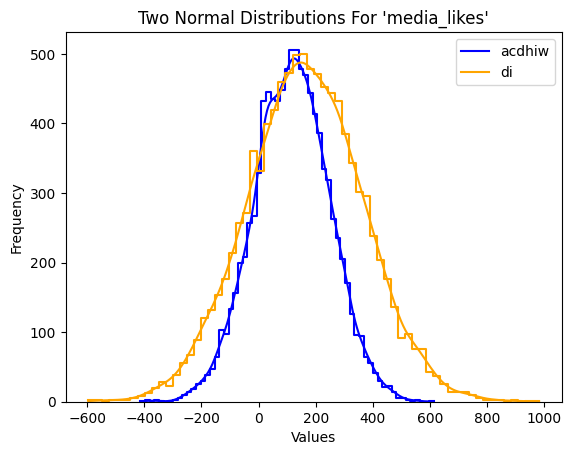

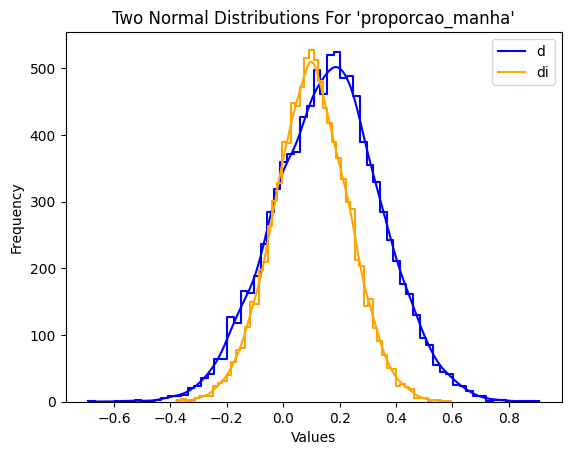

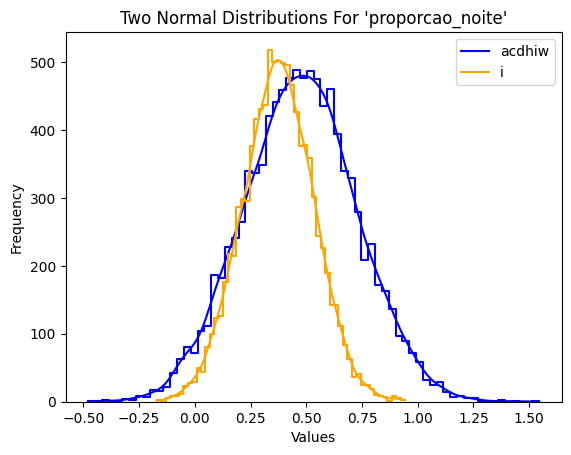

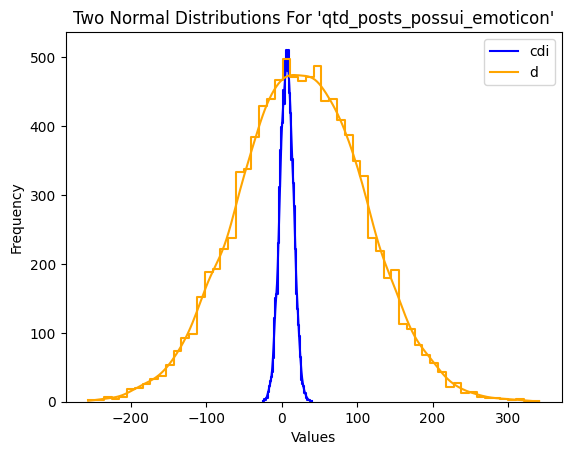

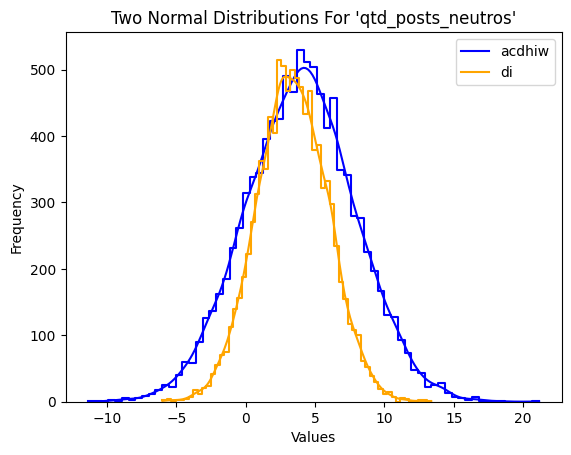

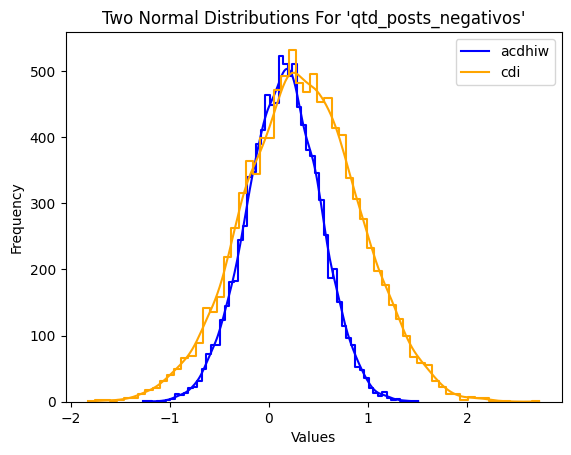

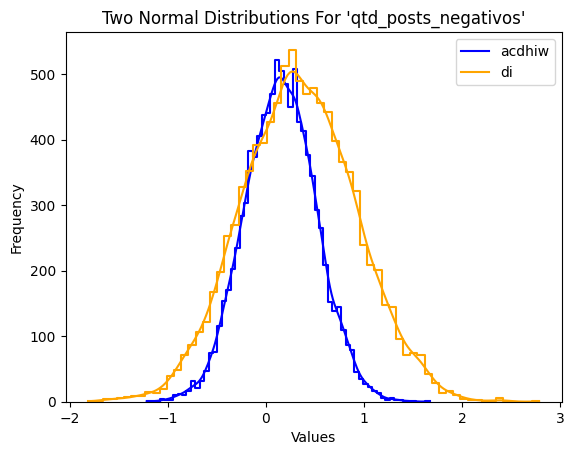

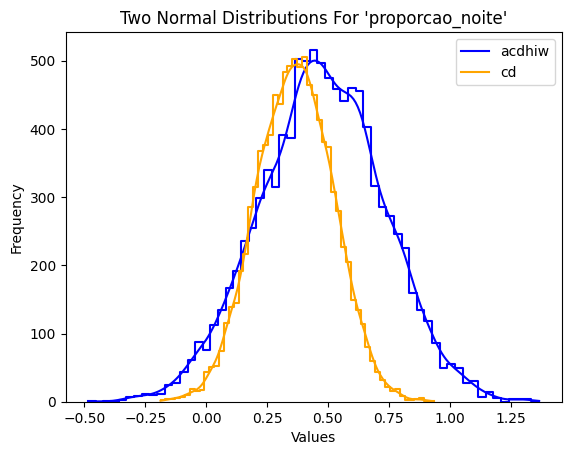

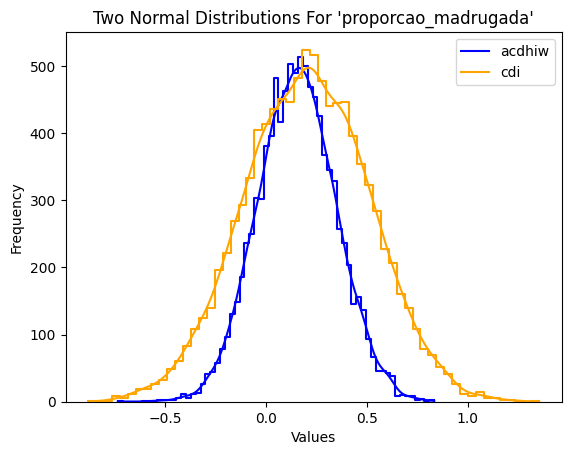

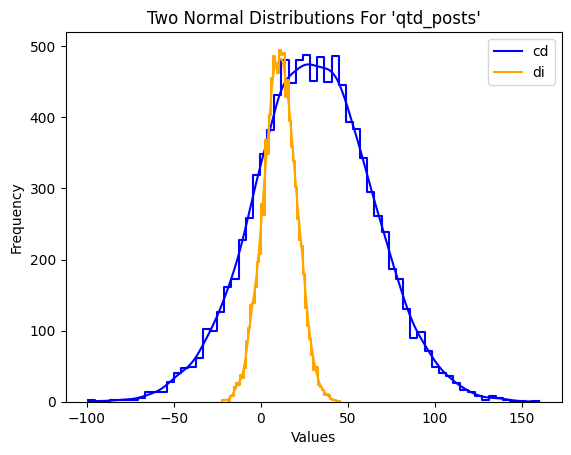

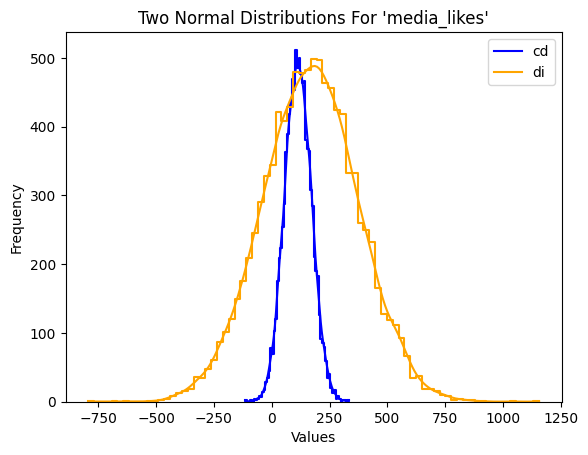

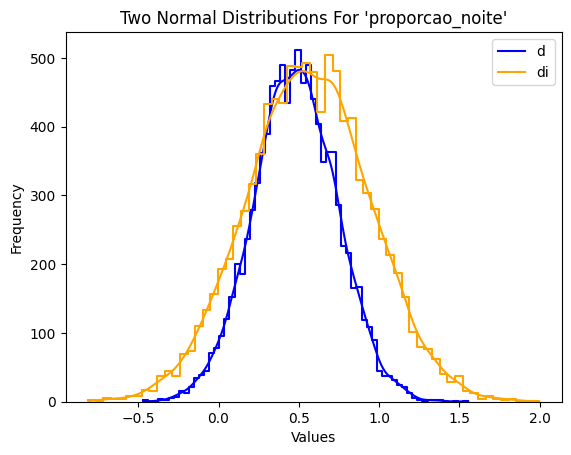

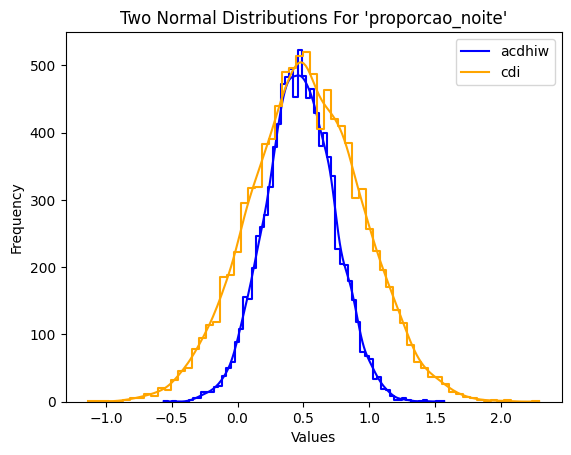

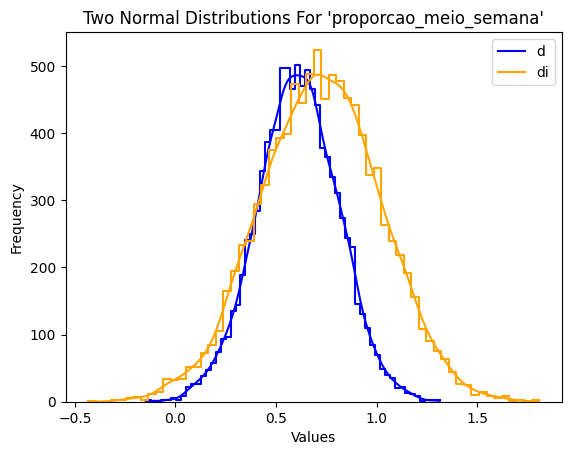

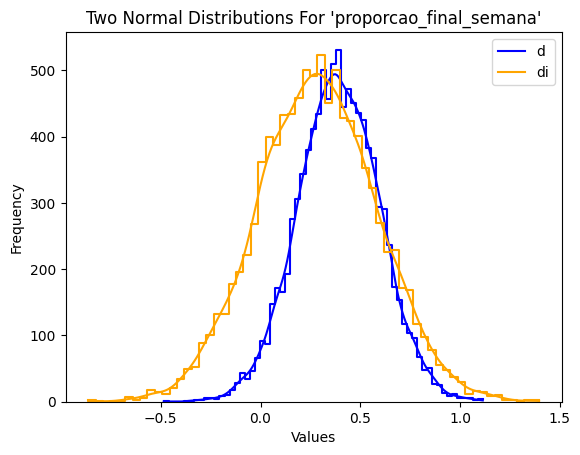

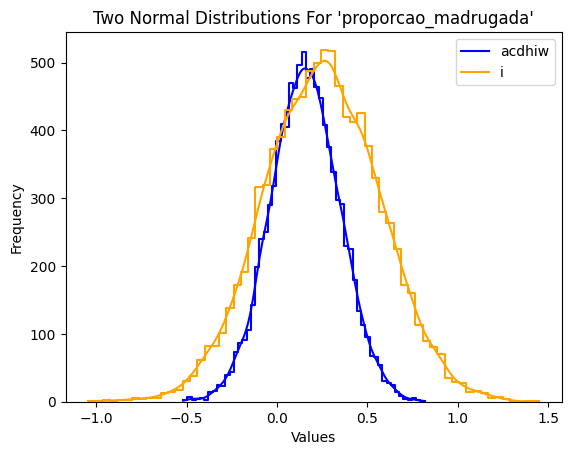

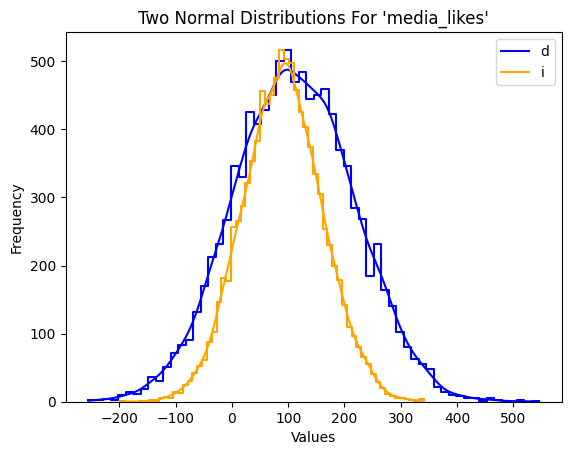

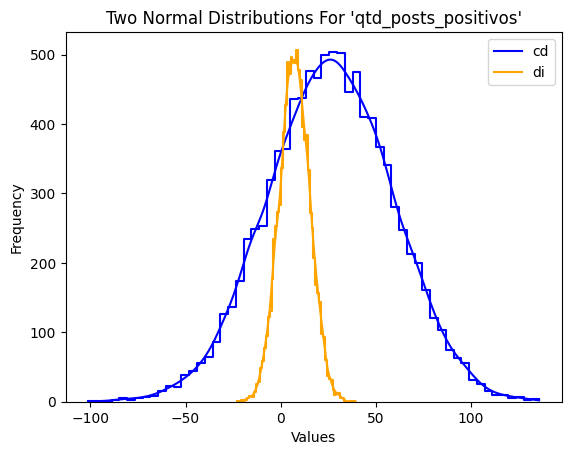

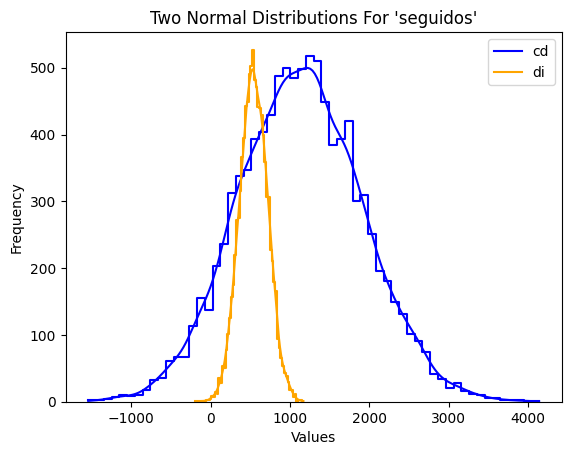

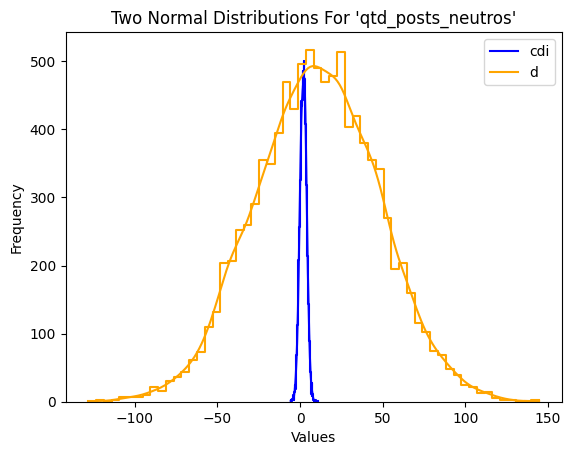

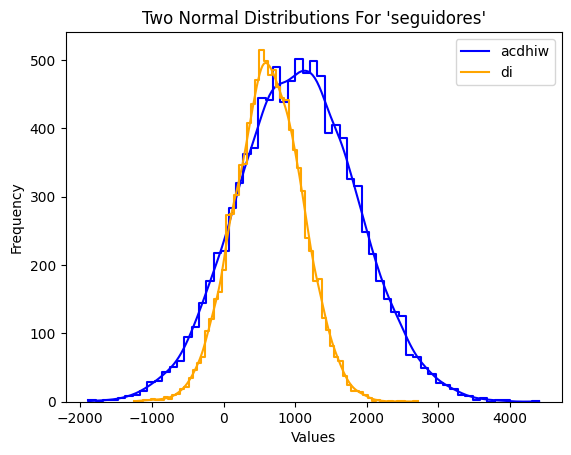

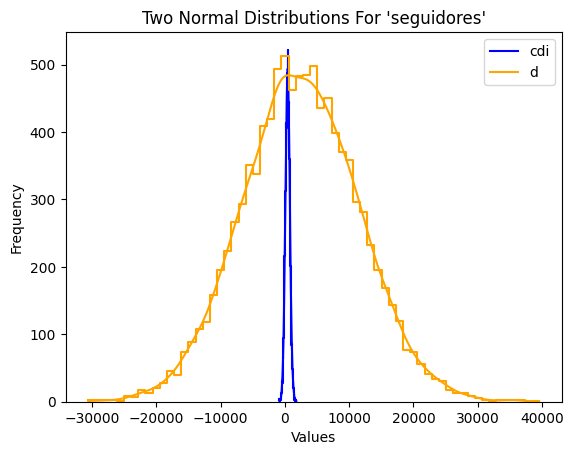

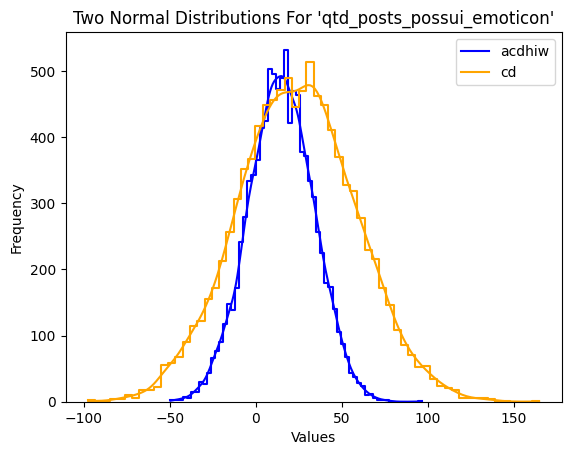

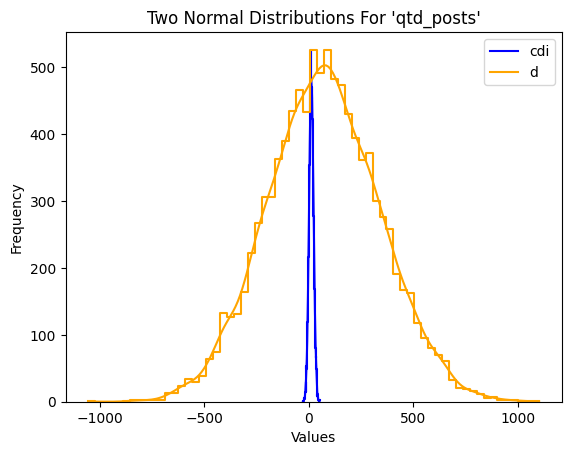

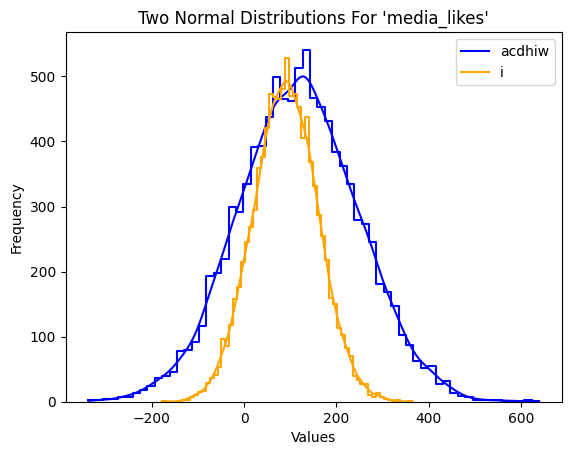

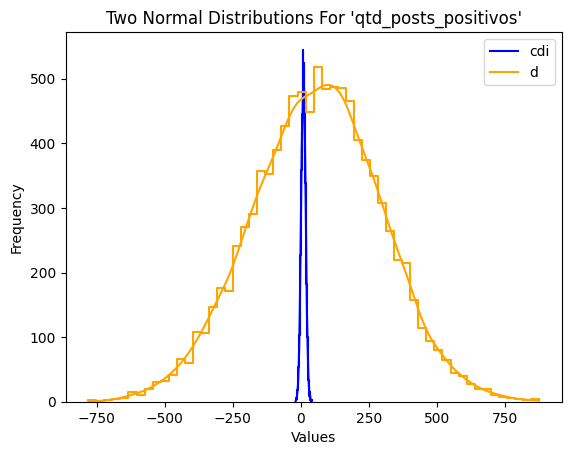

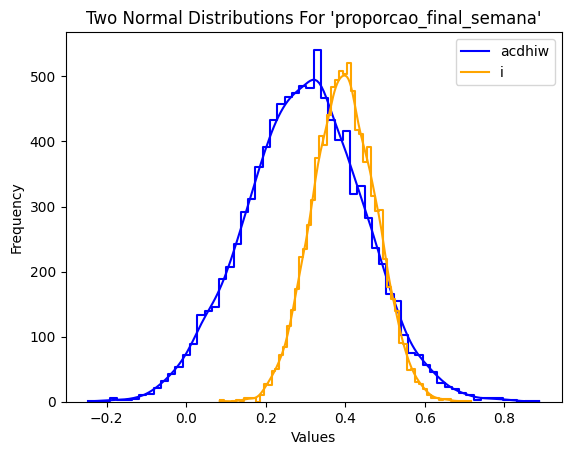

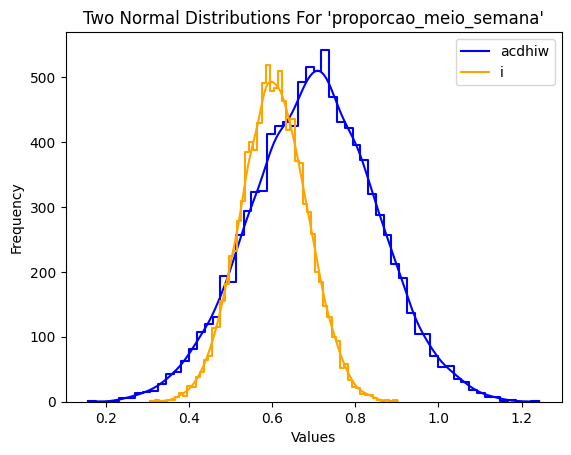

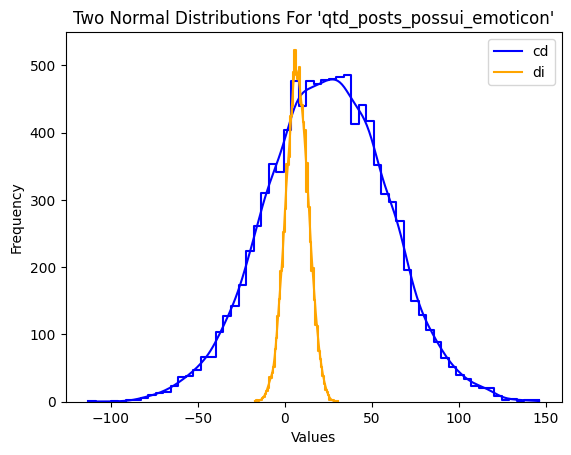

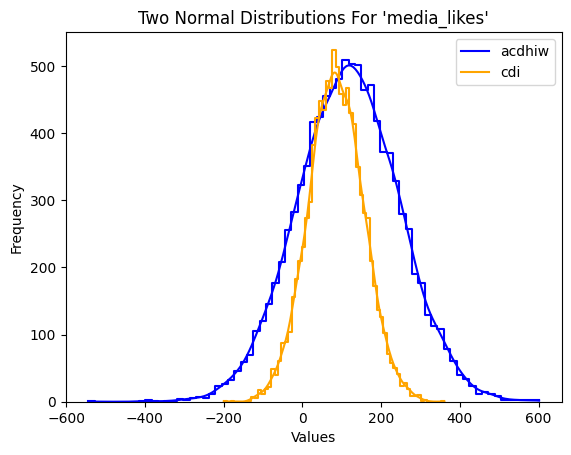

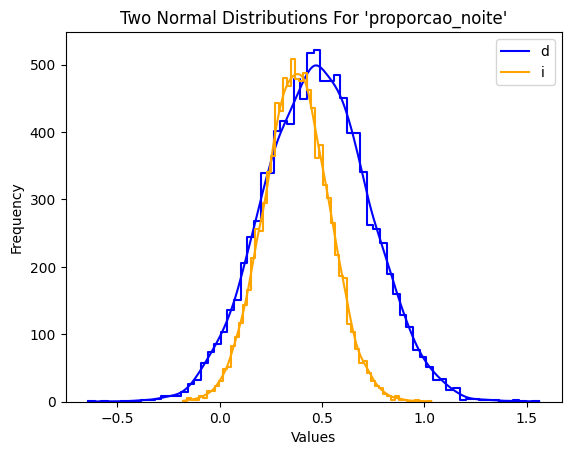

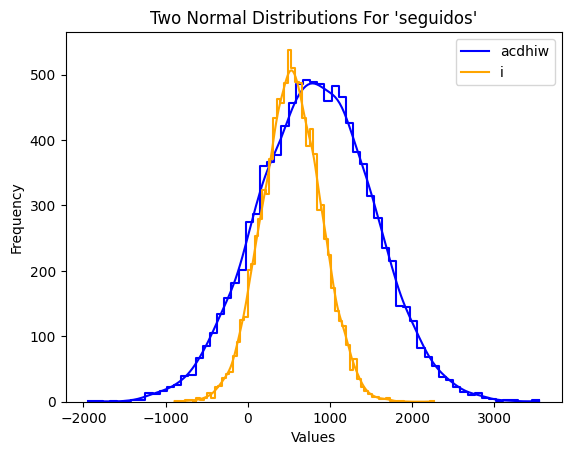

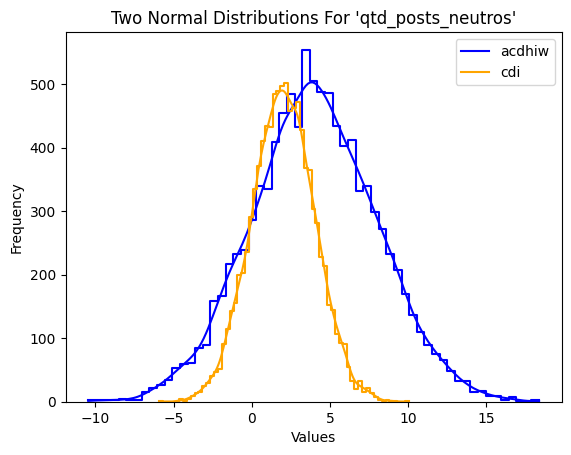

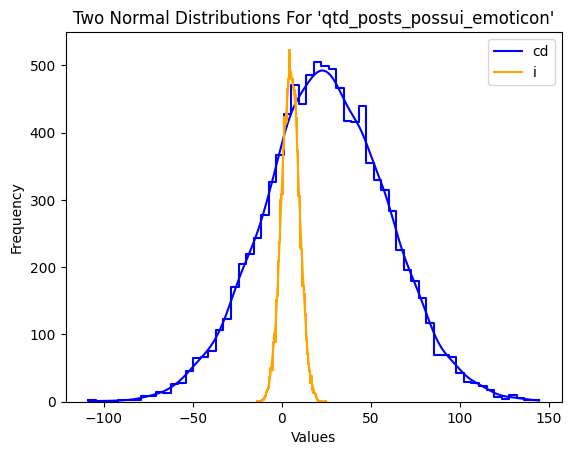

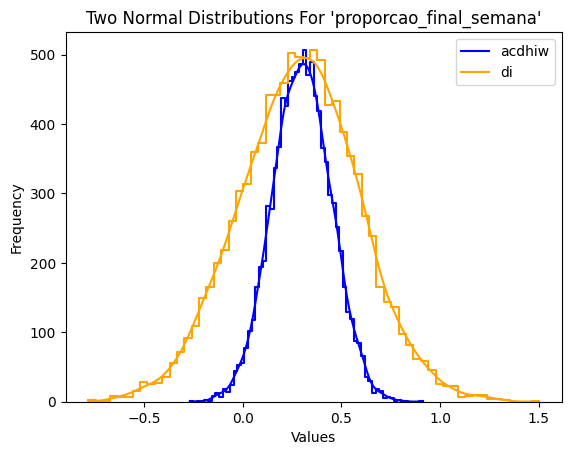

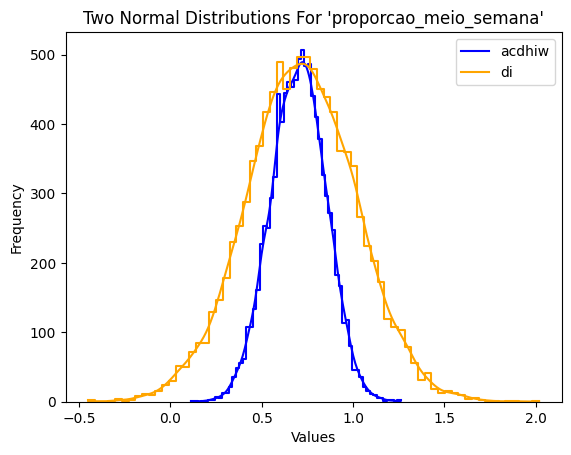

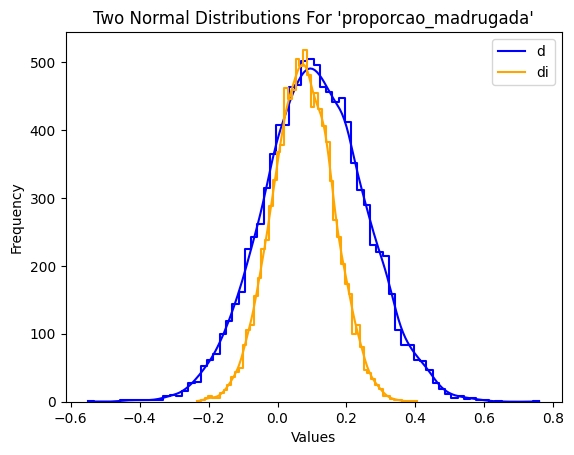

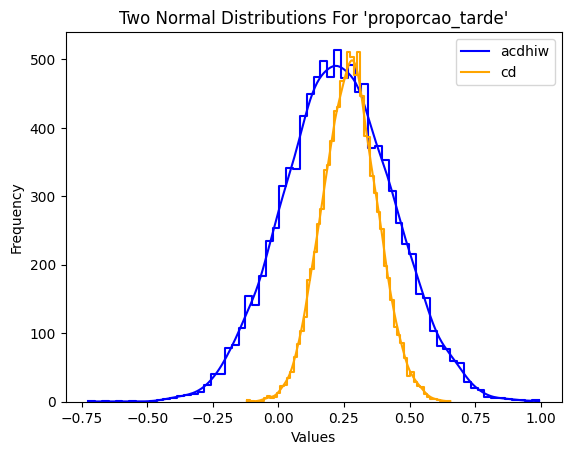

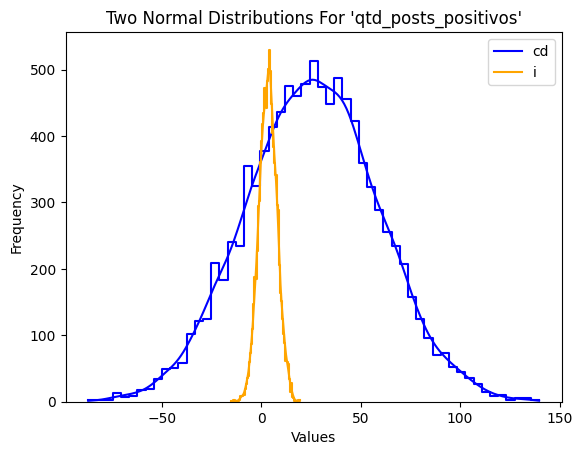

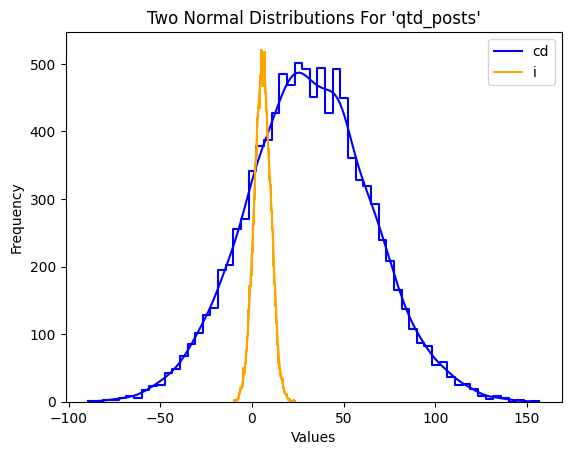

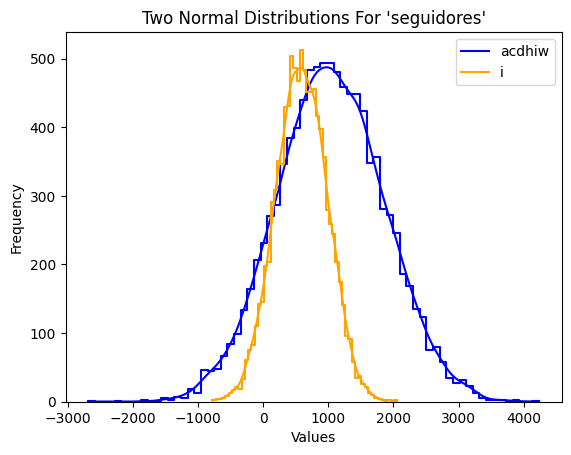

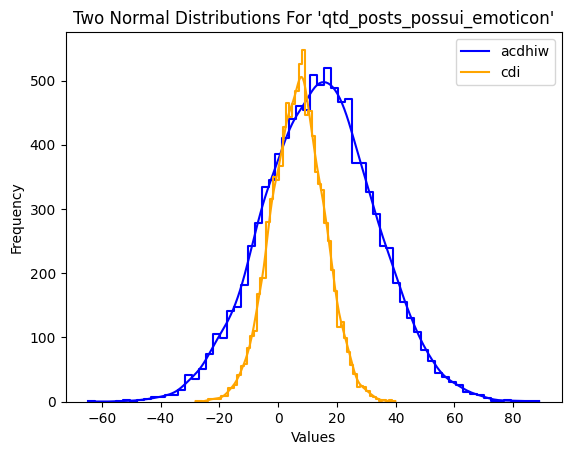

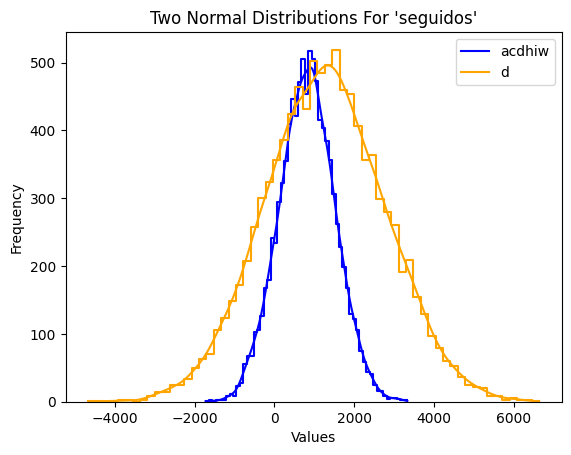

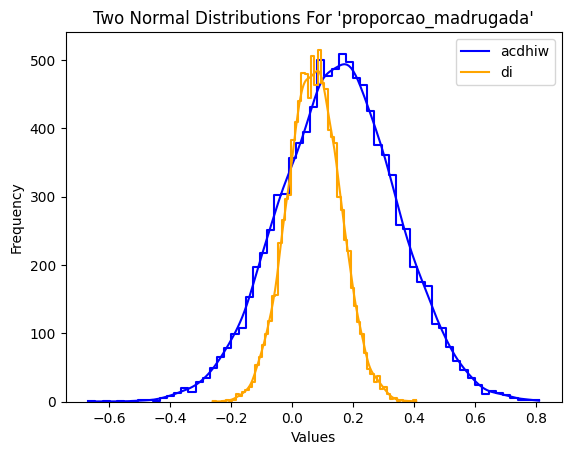

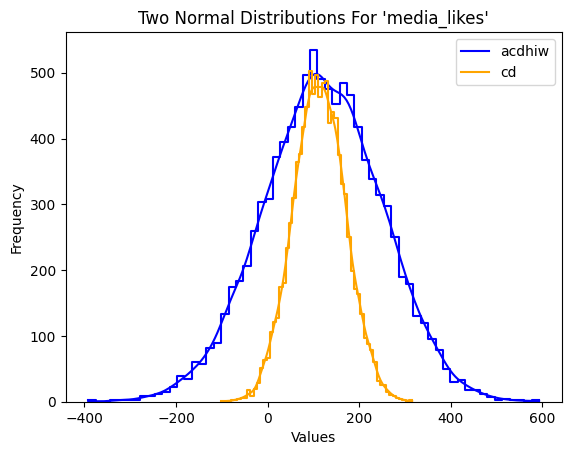

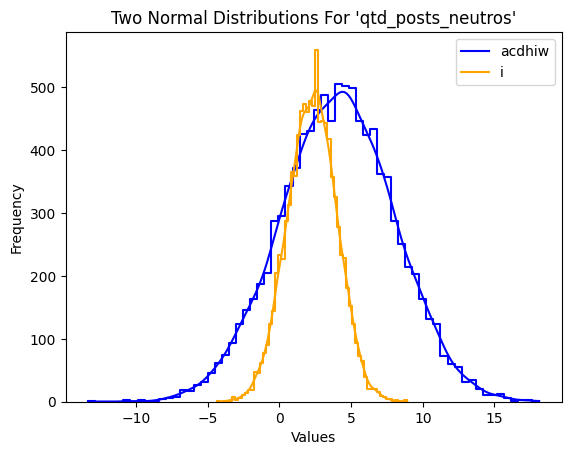

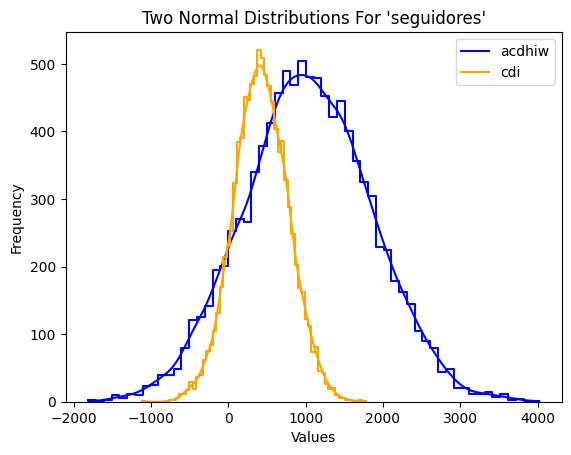

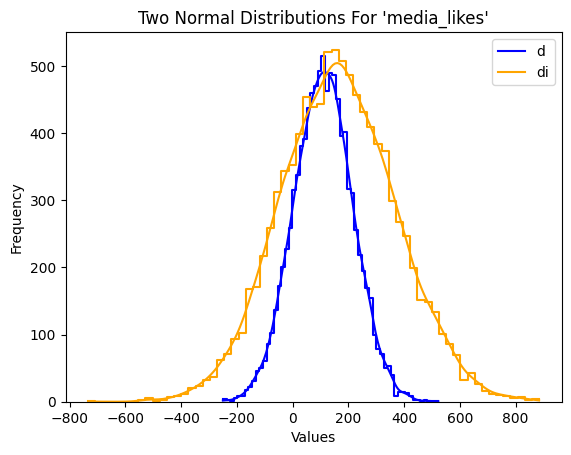

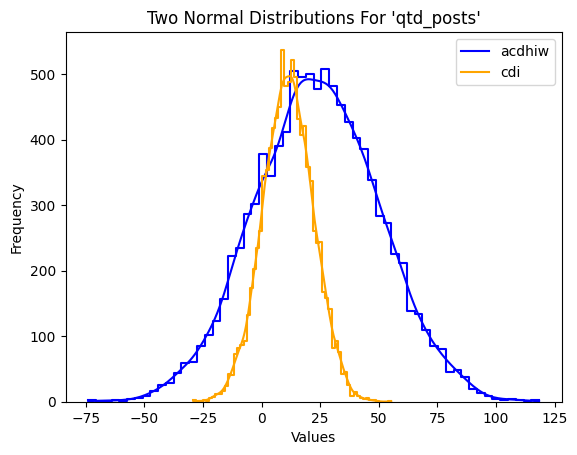

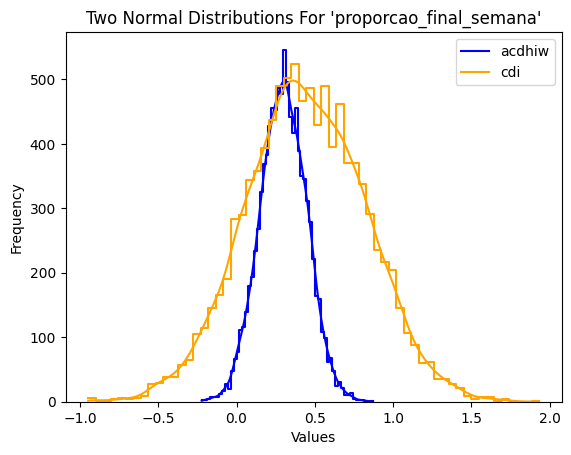

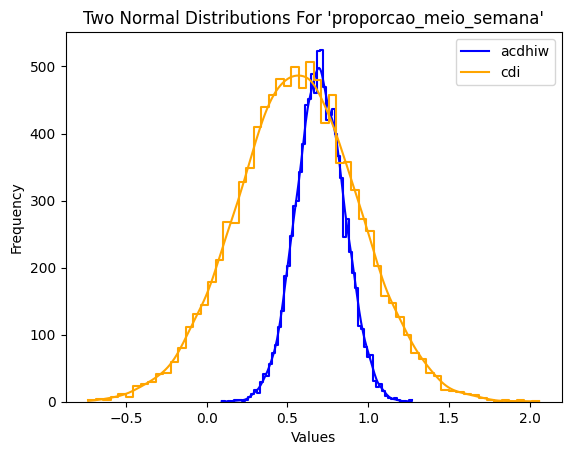

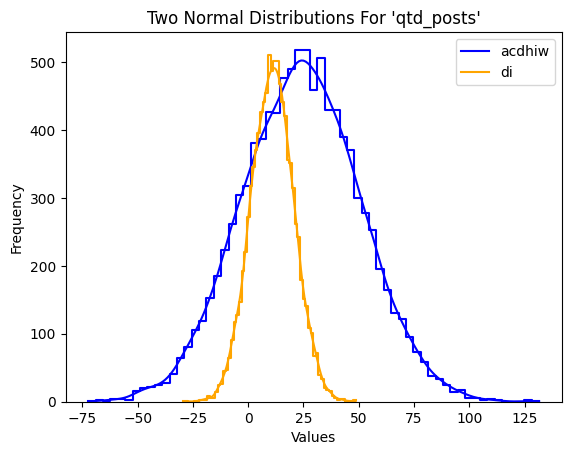

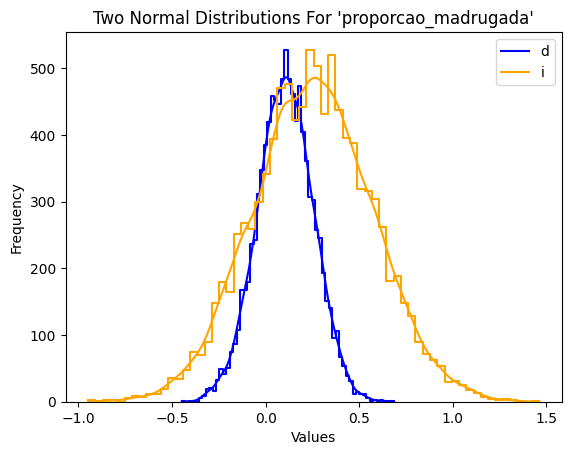

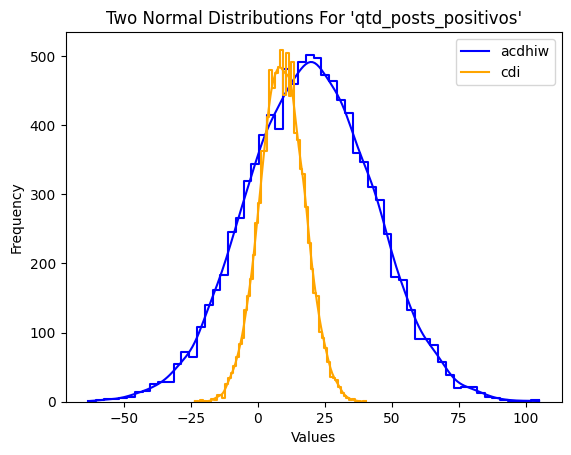

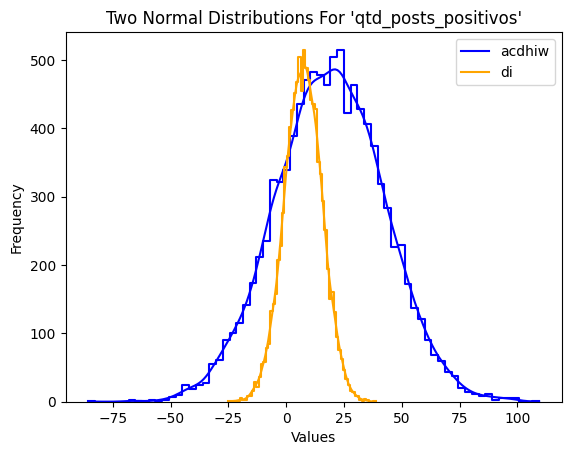

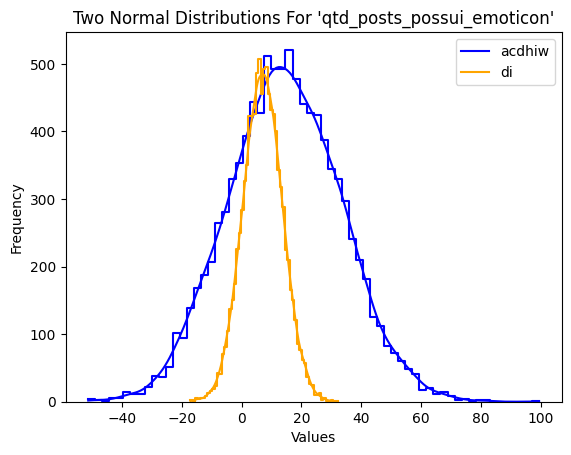

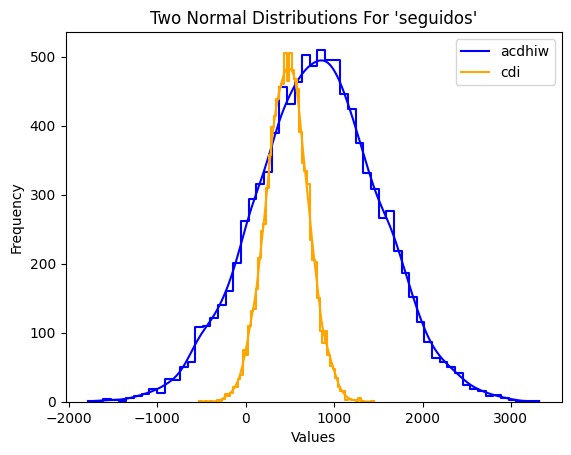

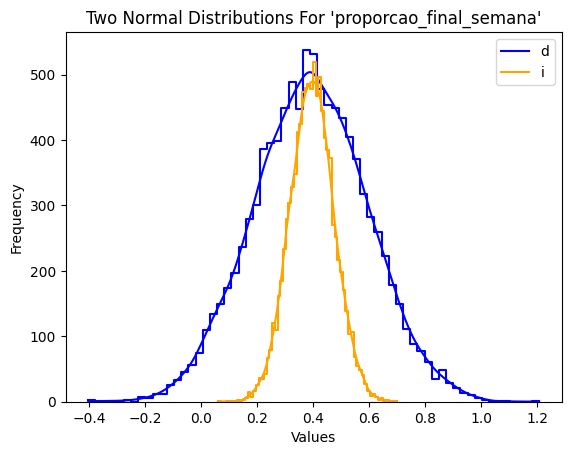

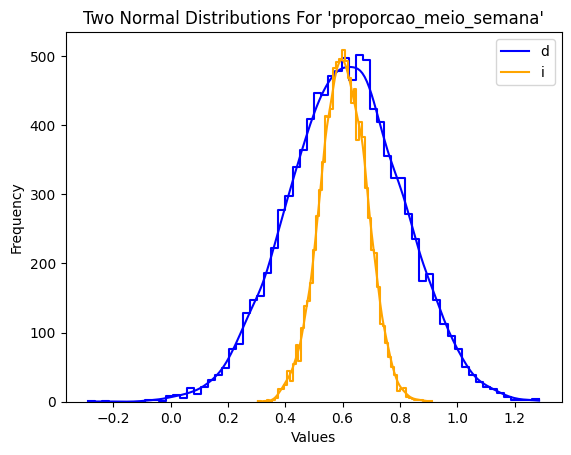

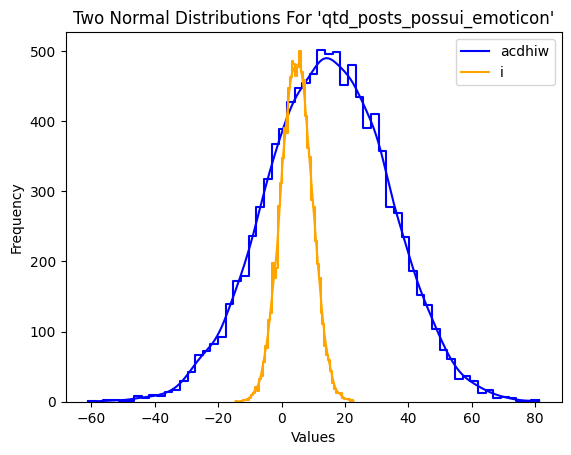

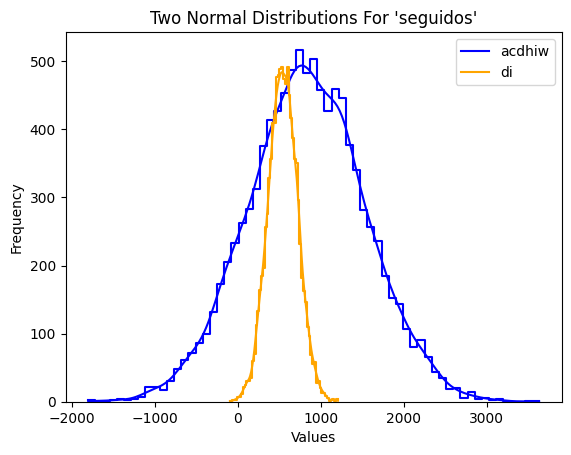

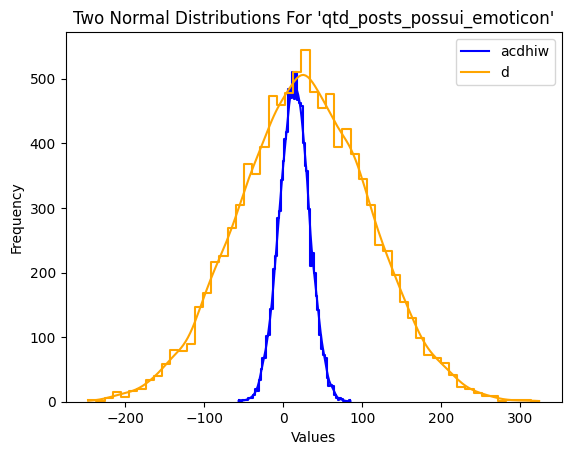

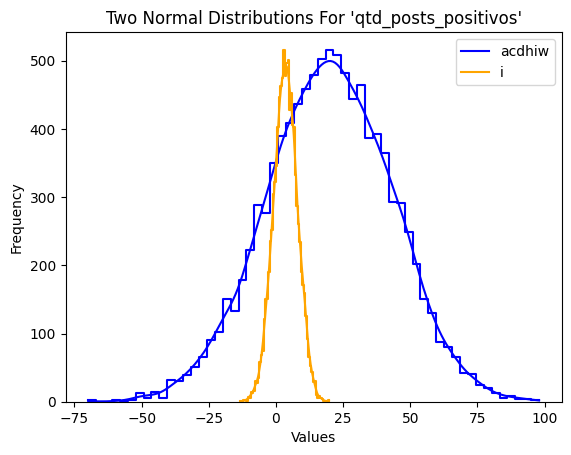

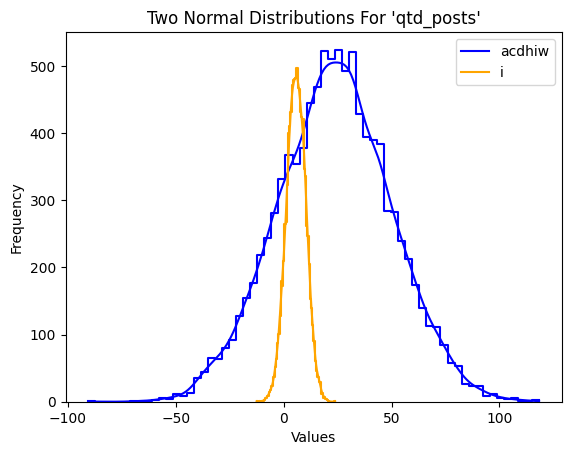

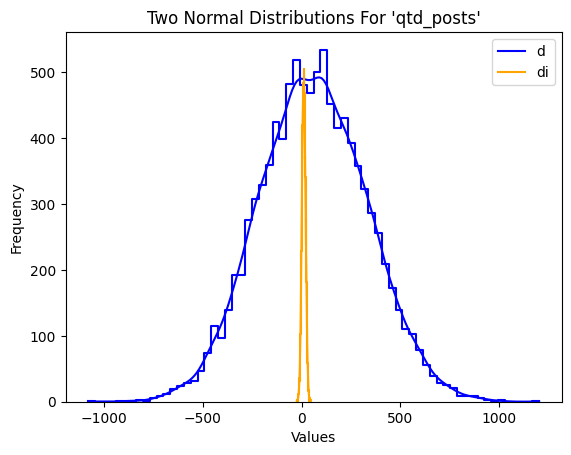

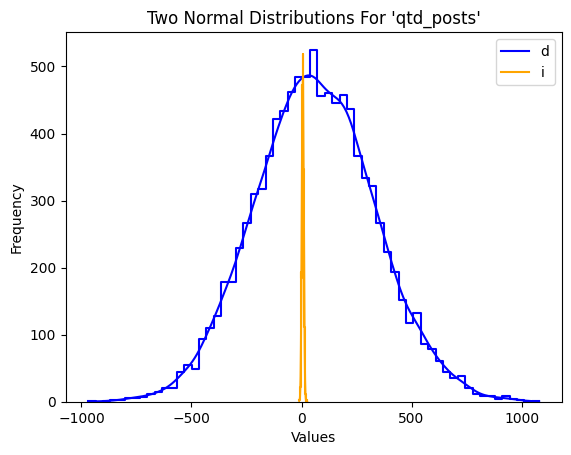

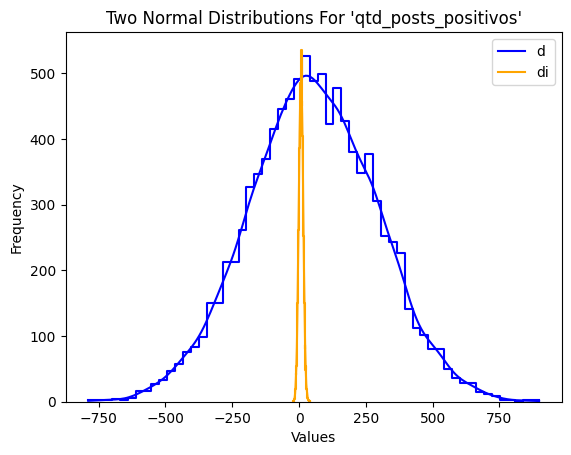

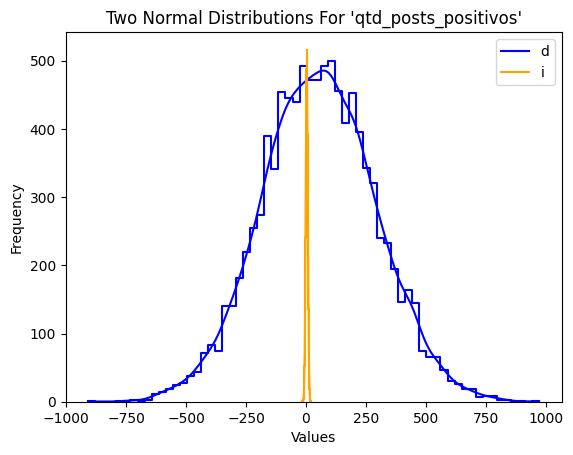

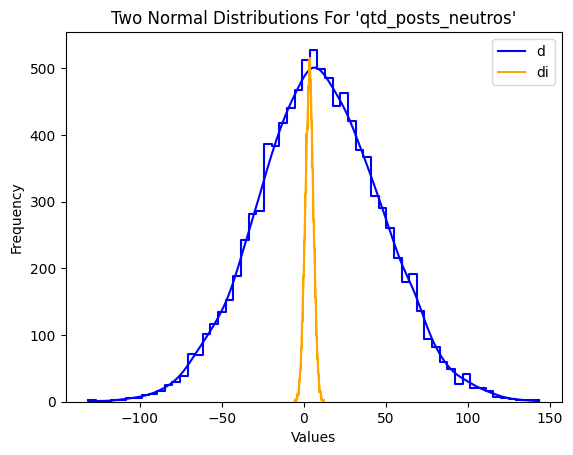

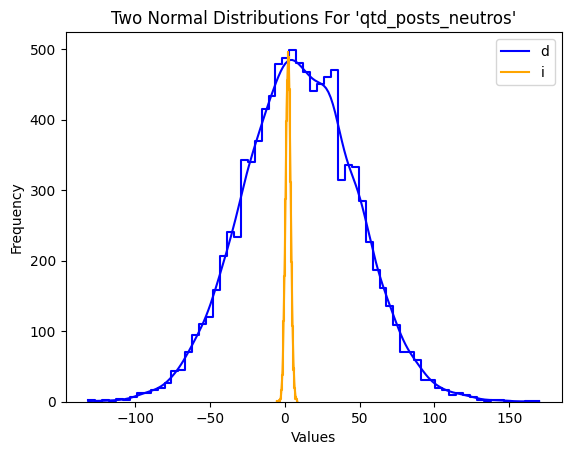

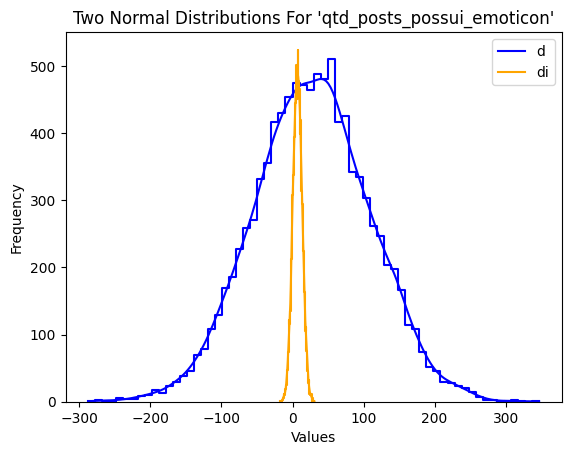

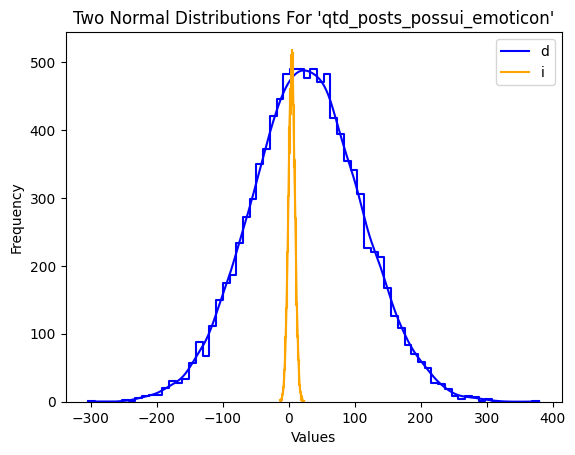

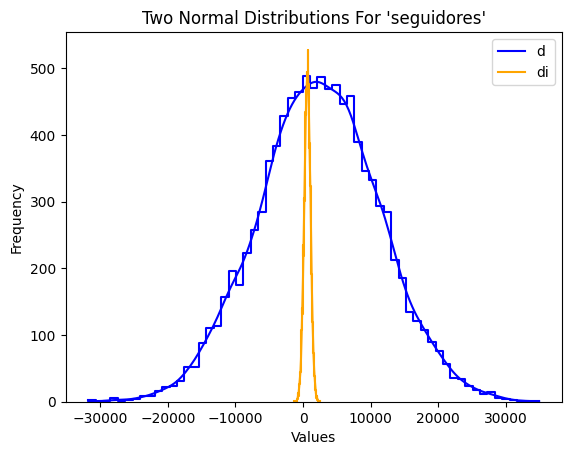

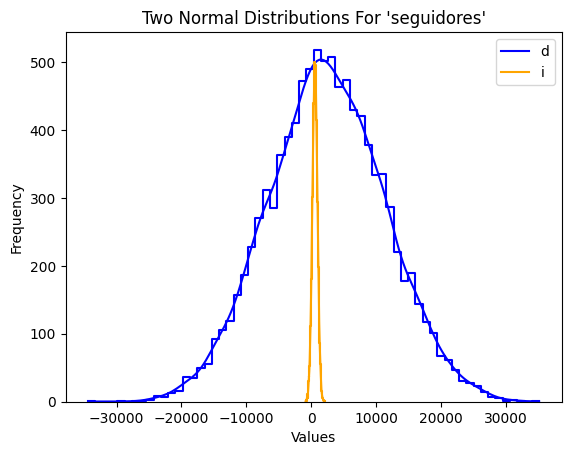

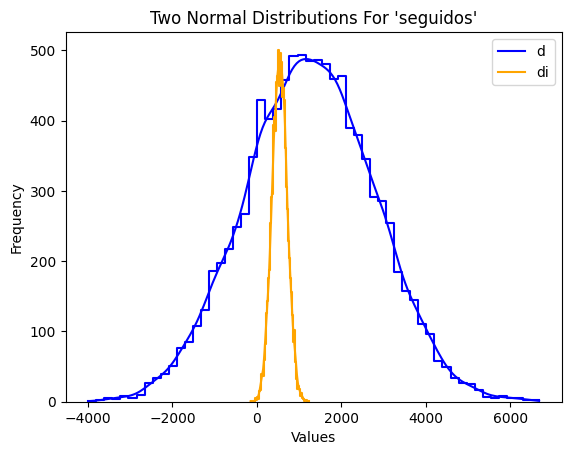

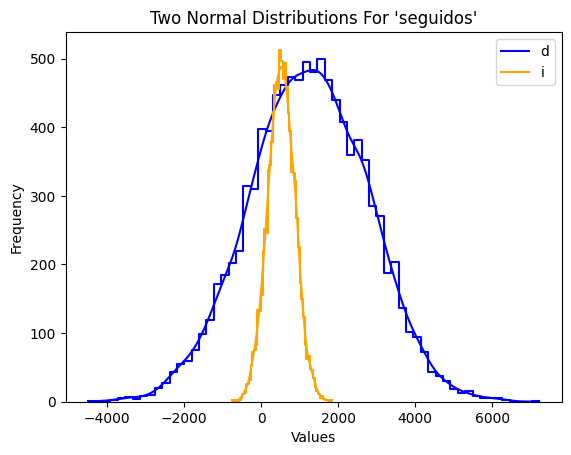

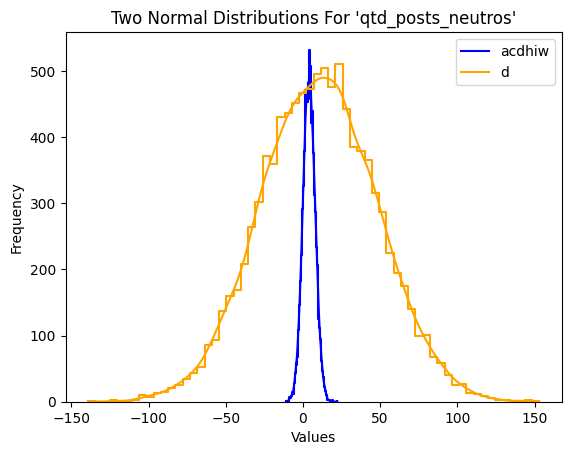

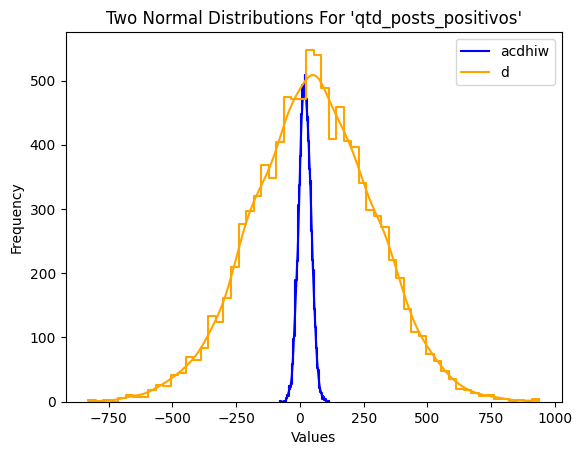

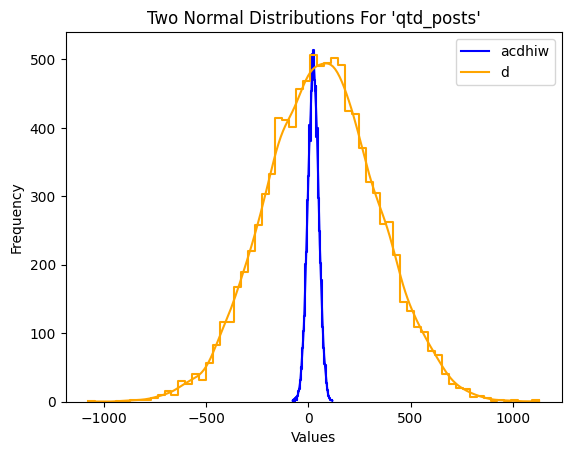

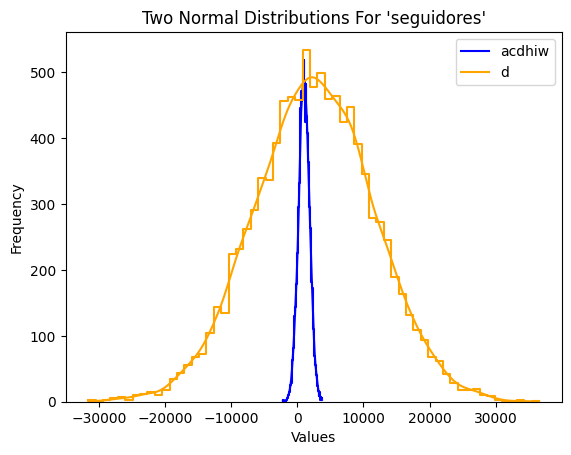

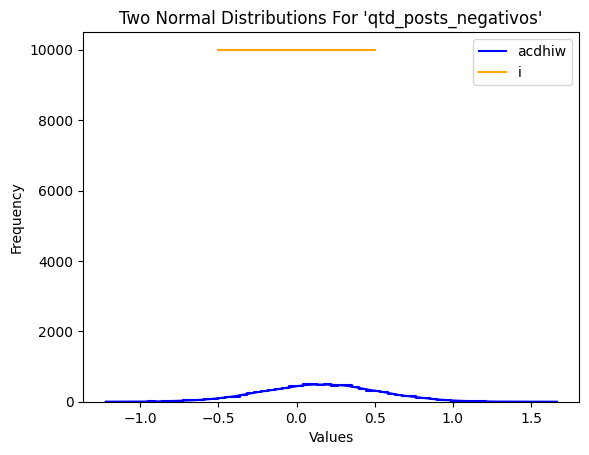

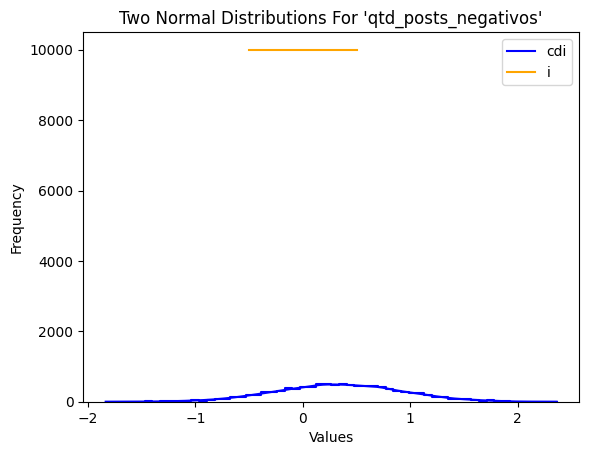

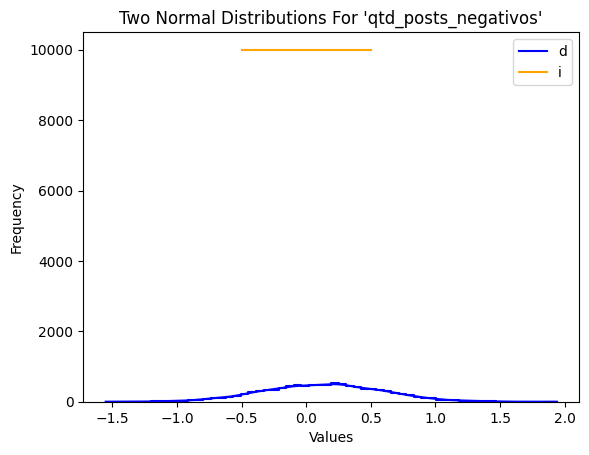

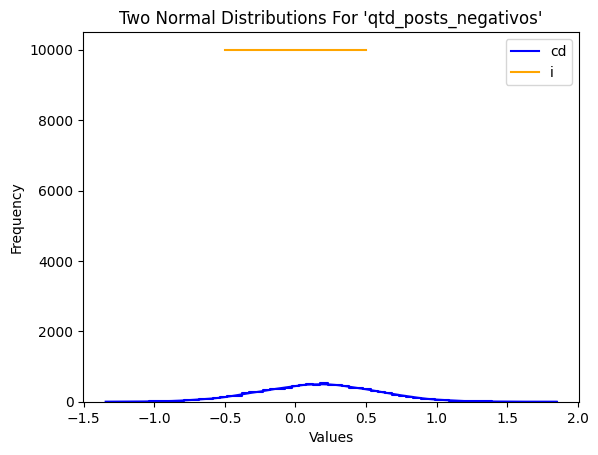

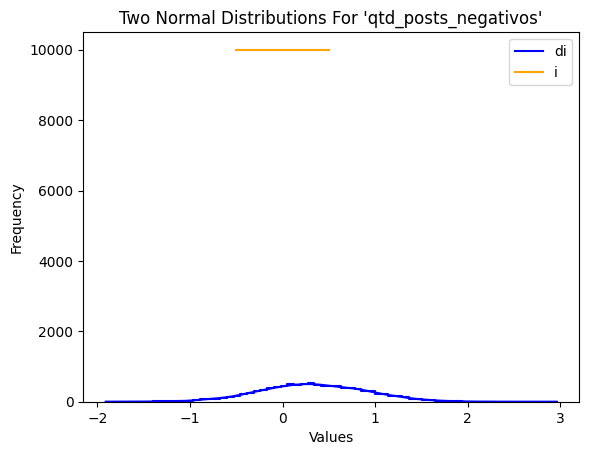

In [123]:
msf = metrics_stratified_filtered(users)
significants = calc_all_var_significants(users, alpha=0.05)

for metric, temp1, temp2, _ in sorted(significants, key=lambda k: k[3], reverse=True):
    draw_distributions(temp1, temp2, metric, msf)


In [22]:
import networkx as nx
import matplotlib.pyplot as plt

In [57]:
# for .csv

def create_graph_from_metric(users, metrics_stratified=None, metric=Metrica.uni, cuttoff=Metrica.cuttoff):
    G = nx.Graph()
    ms = metrics_stratified_filtered(users)
    
    for i, di in users.iterrows():
        idi = str(di['user_id']) + '-' + di['temperamento']
        G_juntos.add_node(idi, user_id=di['user_id'], temperamento=di['temperamento'])
        
        for j, dj in users.iterrows():
            weight = metric(di, dj, 'qtd_posts')
            
            if j > i and cuttoff(weight, 0):
    
                idj = str(dj['user_id']) + '-' + dj['temperamento']
                G_juntos.add_node(idj, user_id=dj['user_id'], temperamento=dj['temperamento'])
                G_juntos.add_edge(idi, idj, weight=weight)

    return G

In [58]:
G_juntos = create_graph_from_metric(users)

In [59]:
G_juntos.nodes(data=True)

NodeDataView({})

In [81]:
G_juntos.edges()

EdgeView([('8-ad', '1027-d'), ('8-ad', '1030-d'), ('1027-d', '10-acdhiw'), ('1027-d', '12-cdi'), ('1027-d', '13-d'), ('1027-d', '14-cd'), ('1027-d', '15-d'), ('1027-d', '16-d'), ('1027-d', '17-d'), ('1027-d', '19-di'), ('1027-d', '21-d'), ('1027-d', '26-cd'), ('1027-d', '52-d'), ('1027-d', '59-acdhiw'), ('1027-d', '73-d'), ('1027-d', '87-d'), ('1027-d', '109-d'), ('1027-d', '115-i'), ('1027-d', '116-d'), ('1027-d', '122-d'), ('1027-d', '123-d'), ('1027-d', '126-acdhiw'), ('1027-d', '134-d'), ('1027-d', '136-acdhiw'), ('1027-d', '154-d'), ('1027-d', '161-acdhiw'), ('1027-d', '162-d'), ('1027-d', '167-d'), ('1027-d', '172-cd'), ('1027-d', '173-acdhiw'), ('1027-d', '187-d'), ('1027-d', '202-hi'), ('1027-d', '204-acdhiw'), ('1027-d', '205-acdhiw'), ('1027-d', '210-acdhiw'), ('1027-d', '212-d'), ('1027-d', '214-cd'), ('1027-d', '219-d'), ('1027-d', '220-acdhiw'), ('1027-d', '225-d'), ('1027-d', '228-d'), ('1027-d', '229-d'), ('1027-d', '232-d'), ('1027-d', '234-d'), ('1027-d', '236-acdhiw')

In [82]:
users['temperamento'].value_counts()

temperamento
d         44
acdhiw    27
cd         6
i          4
cdi        3
di         3
ad         1
hi         1
dh         1
c          1
Name: count, dtype: int64

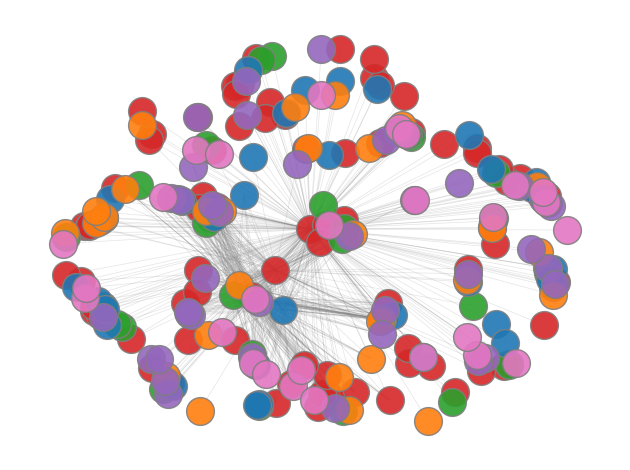

In [83]:
# for _por_temp.csv

G = G_por_temp

color_map = {'depressive': 'tab:red',
             'anxious': 'tab:green',
             'cyclothymic': 'tab:blue',
             'hyperthymic': 'tab:orange',
             'irritable': 'tab:purple',
             'worrying': 'tab:pink'}

# nodes
pos = nx.spring_layout(G, seed=3113794652)  # positions for all nodes
options = {"edgecolors": "tab:gray", "node_size": 400, "alpha": 0.9}

temperamentos = list(color_map.keys())

for temperamento in temperamentos:
    nodelist = list(filter(lambda node: G.nodes()[node]['temperamento'] == temperamento, list(G.nodes())))
    #print(nodelist)
    
    nx.draw_networkx_nodes(G, pos,
                           nodelist=nodelist,
                           node_color=color_map[temperamento],
                           **options)
    

# edges
nx.draw_networkx_edges(G, pos,
                       edgelist=G.edges(),
                       width=0.5,
                       alpha=0.2,
                       edge_color="tab:gray")


plt.tight_layout()
plt.axis("off")
plt.show()

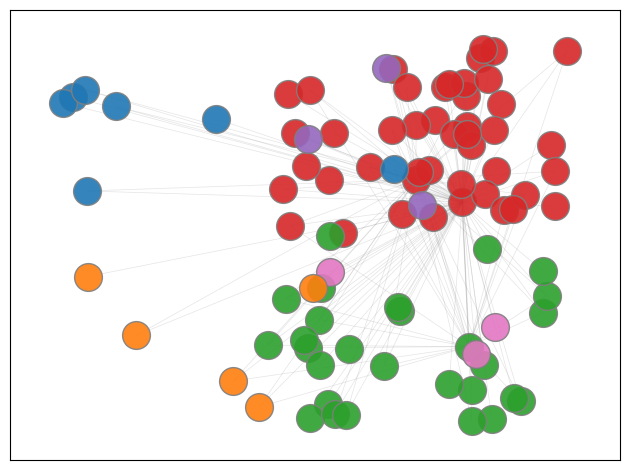

In [85]:
import random

# for .csv

G = G_juntos

color_map = {'d': 'tab:red',
             'acdhiw': 'tab:green',
             'cd': 'tab:blue',
             'i': 'tab:orange',
             'cdi': 'tab:purple',
             'di': 'tab:pink',
             'ad': 'tab:red',
             'hi': 'tab:green',
             'dh': 'tab:blue',
             'c': 'tab:orange'}

max_dir = 5
color_map_dir = {'d': (1,1),
                 'acdhiw': (1,-1),
                 'cd': (-1,1),
                 'i': (-1,-1),
                 'cdi': (1,1),
                 'di': (1,-1),
                 'ad': (-1,1),
                 'hi': (-1,-1),
                 'dh': (1,1),
                 'c': (1,-1)}

# nodes
# pos = nx.spring_layout(G, seed=252346)  # positions for all nodes
pos = {}
options = {"edgecolors": "tab:gray", "node_size": 400, "alpha": 0.9}

temperamentos = list(color_map.keys())

for temperamento in temperamentos:
    nodelist = list(filter(lambda node: G.nodes()[node]['temperamento'] == temperamento, list(G.nodes())))
    for node in nodelist:
        drctn = color_map_dir[temperamento]
        dir_x = drctn[0]
        dir_y = drctn[1]
        rand_x = random.uniform(0, max_dir)
        rand_y = random.uniform(0, max_dir)
        # print(dir_x * rand_x, dir_y * rand_y)
        pos.update({node: (dir_x * rand_x, dir_y * rand_y)})
    
    nx.draw_networkx_nodes(G, pos,
                           nodelist=nodelist,
                           node_color=color_map[temperamento],
                           label=temperamento,
                           **options)
    

# edges
nx.draw_networkx_edges(G, pos,
                       edgelist=G.edges(),
                       width=0.5,
                       alpha=0.2,
                       edge_color="tab:gray")


plt.tight_layout()
plt.axis("on")
plt.show()

In [110]:
G = G_juntos
nx.degree_centrality(G)

{'8.0-ad': 0.022222222222222223,
 '1027.0-d': 1.0,
 '1030.0-d': 0.45555555555555555,
 '10.0-acdhiw': 0.03333333333333333,
 '1002.0-acdhiw': 0.2888888888888889,
 '12.0-cdi': 0.03333333333333333,
 '13.0-d': 0.03333333333333333,
 '14.0-cd': 0.011111111111111112,
 '15.0-d': 0.011111111111111112,
 '16.0-d': 0.011111111111111112,
 '17.0-d': 0.03333333333333333,
 '19.0-di': 0.011111111111111112,
 '21.0-d': 0.022222222222222223,
 '26.0-cd': 0.011111111111111112,
 '52.0-d': 0.011111111111111112,
 '59.0-acdhiw': 0.03333333333333333,
 '73.0-d': 0.011111111111111112,
 '87.0-d': 0.011111111111111112,
 '109.0-d': 0.011111111111111112,
 '115.0-i': 0.03333333333333333,
 '116.0-d': 0.03333333333333333,
 '122.0-d': 0.011111111111111112,
 '123.0-d': 0.011111111111111112,
 '126.0-acdhiw': 0.011111111111111112,
 '134.0-d': 0.011111111111111112,
 '136.0-acdhiw': 0.011111111111111112,
 '154.0-d': 0.022222222222222223,
 '161.0-acdhiw': 0.011111111111111112,
 '162.0-d': 0.011111111111111112,
 '167.0-d': 0.0111

In [112]:
G = G_por_temp

communities = {'depressive': [], 'anxious': [], 'cyclothymic': [], 'hyperthymic': [], 'irritable': [], 'worrying': []}

for n, dn in G.nodes(data=True):
    communities[dn['temperamento']].append(n)

communities = list(map(lambda e: set(e), communities.values()))

nx.community.modularity(G, communities)

-0.10156192925350473

In [113]:
G = G_juntos

communities = {'d': [],
             'acdhiw': [],
             'cd': [],
             'i': [],
             'cdi': [],
             'di': [],
             'ad': [],
             'hi': [],
             'dh': [],
             'c': []}

for n, dn in G.nodes(data=True):
    communities[dn['temperamento']].append(n)

communities = list(map(lambda e: set(e), communities.values()))

nx.community.modularity(G, communities)

-0.08675969048519093

In [77]:
# for _por_temp.csv

users = pd.read_csv(por_temp_str)

G_por_temp = nx.Graph()
for i, di in users.iterrows():
    iniciali = di['temperamento'][0]
    idi = str(di['user_id']) + iniciali
    G_por_temp.add_node(idi, user_id=idi, temperamento=di['temperamento'])
    
    for j, dj in users.iterrows():
        weight = Metrica.uni(di, dj, 'qtd_posts')
        
        if j > i and Metrica.cuttoff(weight, metrics['qtd_posts']['std'] / 2):

            inicialj = dj['temperamento'][0]
            idj = str(dj['user_id']) + inicialj
            G_por_temp.add_node(idj, user_id=idj, temperamento=dj['temperamento'])
            G_por_temp.add_edge(idi, idj, weight=weight)